# Starbucks - scheduling promotion strategy using Machine Learning

## Table of Contents

[Introduction](#introduction)

[1 Business Understanding](#business_understanding)

[2 Data Understanding](#data_understanding)

[3 Data Preparation](#data_preparation)

[4 Exploratory Data Analysis](#exploratory_data_analysis)

[5 Modeling and Evaluation](#modeling_and_evaluation)

[6 Deployment](#deployment)

[References](#references)

## Introduction <a class='anchor' id='introduction'></a>

<p>In this project we will analyse simulated data provided by Starbucks which mimics customer behavior in relation to promotion offers on the Starbucks rewards mobile app. 
    First we will explore and clean the data, then make exploratory analysis and finally we build a machine learning classification model to predict customer responses on individual promotional offers. 

<h3>About Starbucks</h3>
<p>At first let me introduce the company with some general information: Starbucks Corporation, existing since 1971, is a multinational chain of coffee houses and roastery reserves with headquarter in Seattle, United States. 
    It is the world's largest coffee house chain with over 30,000 locations worldwide in more than 70 countries. 
    Starbucks locations serve in general hot and cold drinks, whole-bean coffee, microground instant coffee, espresso, caffe latte, full- and loose-leaf teas including Teavana tea products, Evolution Fresh juices, Frappuccino beverages, La Boulange pastries, and snacks including items such as chips and crackers.[1]
    
<h3>Starbucks rewards mobile app</h3>
<p>The provided data set for this project contains simulated data which mimics customer behavior on the Starbucks rewards mobile app. 
    This mobile app is a simplified version of the real Starbucks app, because the underlying simulator only has one product, while the real app contains dozens of Starbucks product. 
    In particular the data set contains data of transactions, customer demographics and offer types.[2]
    
<p>This mobile app works as follows: once every few days, Starbucks sends out a promotional offer to its users. 
    An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (i.e. Buy One Get One free). 
    Some users might not receive any offer during certain weeks and not all users receive the same offer.
    Every offer has a validity period before the offer expires. For example, a BOGO offer might be valid for only 5 days.
    The data set contains also informational offers which are merely providing information about a product. For example, if an informational offer has 7 days of validity, it can be assumed the customer is feeling the influence of the offer for 7 days after receiving the advertisement. 
    Furthermore the transactional data shows user purchases made on the app including the timestamp of each purchase and the amount of money spent on a purchase. 
    This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. 
    There are also records for when a user completes an offer. It can be also possible that a customer using the app might make a purchase through the app without having received an offer or seen an offer.[2]
     
<p>To give an example how the reward process works, a user could receive a discount offer buy 10 dollars get 2 off. 
    The offer is valid for 10 days from receipt. 
    If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer. 
    It has also to be considered that a customer can receive an offer, never actually views the offer, and still completes the offer. 
    For example, a customer might receive the "buy 10 dollars get 2 dollars off offer", but never opens the offer during the 10 day validity period, while he spends 15 dollars during those ten days. 
    Thus there will be an offer completion record in the data set while the customer was not influenced by the offer.[2]
  
<p>Analysing customer data and finding preferences in customer behaviour is an exciting and important field for catering, retail and other service trades. I'm very excited to explore the given data sets and see which insights can be found and how well the machine learning classification models will predict customer responses.

<p>The following analysis is a project of Udacity's Data Science Nanodegree and will be structures according the Cross-Industry Standard Process for Data Mining (CRISP-DM). As tool for the analysis we use the programming language python with its libraries numpy, pandas, sklearn for data analysis and matplotlib, seaborn for data vizualization. 

## 1 Business Understanding <a class='anchor' id='business_understanding'></a>

<p>As a first step we need to find out the purpose of our analysis. Therefore we pose following business questions which we will answer with the analysis of the data set:
<ol>
    <li>Can we find relationships between customer demographic group age and income?
    <li>How are offer types distributed in data set related to customer demographics age, income and gender?</li>
    <li>Which are the most popular offers?</li>
    <li>Are there significant differences in age, income and registration date for promotion success?</li>  
    <li>Can we build a classification model to predict promotional offer success for new customers based on their demographical data age, income, registration date and gender?</li>
</ol>

## 2 Data Understanding <a class='anchor' id='data_understanding'></a>

### 2.1 Setup

In [1]:
### setup calculus
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from scipy import stats
import json
import datetime
import joblib

### setup visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### setup sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

### setup warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Load data

In [2]:
### read in json files
portfolio = pd.read_json("data/portfolio.json", orient="records", lines=True)
profile = pd.read_json("data/profile.json", orient="records", lines=True)
transcript = pd.read_json("data/transcript.json", orient="records", lines=True)

### display shape of each data frame
display(portfolio.shape, profile.shape, transcript.shape)

### display first row of each data frame
display(portfolio.head(1), profile.head(1), transcript.head(1))

(10, 6)

(17000, 5)

(306534, 4)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


### 2.3 Format and Explore data

#### 2.3.1 portfolio

In [3]:
### display column info of data set
display(portfolio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


None

In [4]:
### display proportion of missing data for all selected columns
display(portfolio.isnull().mean())

reward        0.0
channels      0.0
difficulty    0.0
duration      0.0
offer_type    0.0
id            0.0
dtype: float64

<h4>Data understanding of portfolio data set</h4>
<p>Data set containing offer ids and meta data about each offer (duration, type, etc.):
<ul>    
    <li>id (string): offer id</li>
    <li>offer_type (string): totally 3 offer types (BOGO, discount, informational)</li>
    <li>difficulty (int): minimum required spend to complete an offer in USD</li>
    <li>reward (int): reward given for completing an offer in USD</li>
    <li>duration (int): time in days for offer to be opened</li>
    <li>channels (list of strings): totally 4 channel types (web, email, mobile, social)</li>
</ul>
<p>Observations:
    
<ul>    
    <li>10 rows and 6 columns</li>
    <li>no missing values</li>
</ul>

#### 2.3.2 profile

In [5]:
### display column info of data set
display(profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


None

<p>Explore gender data: 
<ul>
    <li>check type and size of categories</li>
</ul>

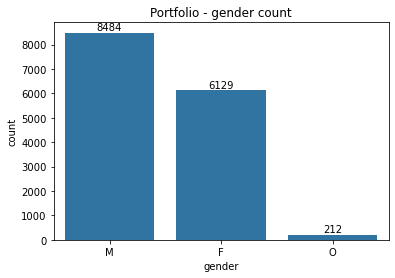

In [6]:
### define base color for bars
base_color = sns.color_palette()[0]
### define frequency with value counts in decreasing order of gender column
freq = profile["gender"].value_counts()
### get index of Series
gen_order = freq.index

### plot bar chart in decreasing order of gender value counts
plt.figure(figsize = [6,4])
sns.countplot(data = profile, x = "gender", color = base_color, order = gen_order)

### get current tick locations and labels
locs, labels = plt.xticks(rotation=0) 
### loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    ### get text property for label to get the correct count
    count = freq[label.get_text()]
    pct_string = "{}".format(count)
    ### print annotation just above top of the bar
    plt.text(loc, count+100, pct_string, ha = "center", color = "black")

plt.title("Portfolio - gender count")
plt.show();

<p>Explore age data: 
<ul>
    <li>check age distribution</li>
</ul>

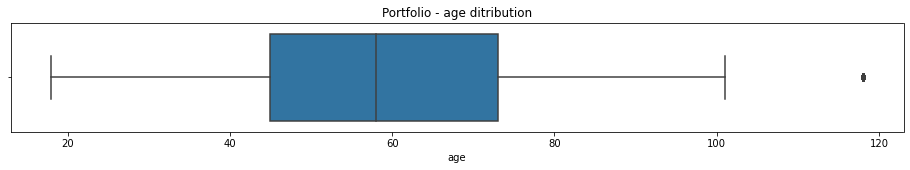

In [7]:
### define base color
base_color = sns.color_palette()[0]
### define figuere size of plot
plt.figure(figsize = [16,2])
### plot box plot showing outliers
sns.boxplot(x = profile["age"], color = base_color)
plt.title("Portfolio - age ditribution")
plt.show();

We can see in the box plot that there are one or more values with age of 118 years. This seems not to be realsitic and looks like an outlier which has to be checked in detail in the data preparation section.

<p>Format and explore become_member_on data:
<ul>
    <li>convert dtype from int64 to datetime64</li>
    <li>view chart with monthly registrations</li>
</ul>

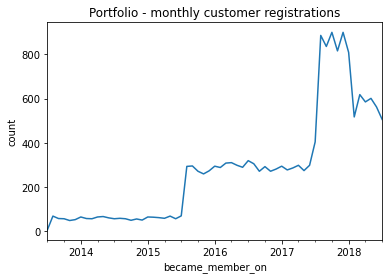

In [8]:
### convert Dtype from int64 to datetime64 in column "became_member_on"
profile["became_member_on"] = pd.to_datetime(profile.became_member_on.astype(str))

### specify Grouper for monthly counts of registrations
monthly_reg = profile.groupby([pd.Grouper(key="became_member_on", freq="M")])["became_member_on"].count()
### show line chart with registration date development
plt.figure(figsize = [6,4])
monthly_reg.plot(title = "Portfolio - monthly customer registrations", ylabel = "count");

<p>Explore income data: 
<ul>
    <li>check income distribution</li>
</ul>

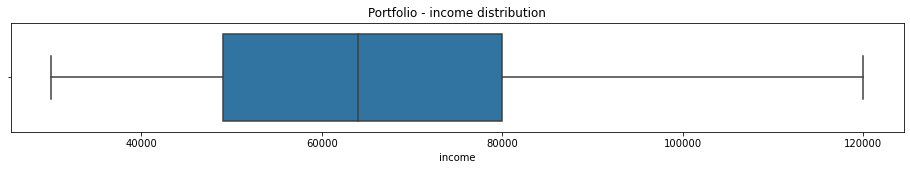

In [9]:
### define base color
base_color = sns.color_palette()[0]
### define figuere size of plot
plt.figure(figsize = [16,2])
### plot box plot showing outliers
sns.boxplot(x = profile["income"], color = base_color)
plt.title("Portfolio - income distribution")
plt.show();

<p>Explore missing and dulicated data: 
<ul>
    <li>check for missing data</li>
    <li>check for dulicated data</li>
</ul>

In [10]:
### display proportion of missing data for all selected columns
display(profile.isnull().sum())

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [11]:
### Check rows with age = 118
age_118 = profile[profile["age"] == 118]
display(age_118.count())

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

<p>There are exactly 2,175 customers with missing data for gender and income. Aside we have 2,175 customers with not realistic age of 118. 
Probably data for gender, income and age was simply not collected for those 2,175 customers at the registration process. We have here a data entry error where for gender and income no values were inserted and for age 118 was inserted.

<p>These 2,175 registrations are appr. 12.8 % of the total customers in the data set, which is not few. Nevertheless rather to compute a value for the missing data (by imputation), we decide to remove all these customers for the further data anaylsis process.

In [12]:
### check for duplicated data (duplicated users):
profile_dupicated = profile.duplicated().sum()
print("Duplicated rows:", profile_dupicated)

Duplicated rows: 0


<h4>Data understanding of profile data set</h4>
<p>Data set containing demographic data for each customer:
<ul>  
    <li>age (int): age of the customer</li>
    <li>became_member_on (int): date when customer created an app account</li>
    <li>gender (str): gender of the customer with totally 3 categories (M, F, O)</li>
    <li>id (string): customer id</li>
    <li>income (float): yearly customer's income in USD</li>
</ul>

<p>Observations:
<ul>  
    <li>17,000 rows and 5 columns</li>
    <li>age has 2175 values with 118 which must be an data entry error (outlier will be removed)</li>    
    <li>gender and income have each 2175 missing values which are in the same rows as the high age value of 118 which we consider as data entry error too</li>
    <li>became_member_on dtype has to be reformated from integer to datetime</li> 
    <li>no duplicated rows</li>
</ul>    

#### 2.3.3 transcript

In [13]:
display(transcript.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


None

<p>Explore event data: 
<ul>
    <li>check type and size of categories</li>
</ul>

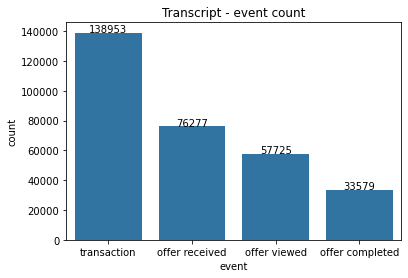

In [14]:
### define base color for bars
base_color = sns.color_palette()[0]
### define frequency with value counts in decreasing order of gender column
freq = transcript["event"].value_counts()
### get index of Series
gen_order = freq.index

### plot bar chart in decreasing order of gender value counts
plt.figure(figsize = [6,4])
sns.countplot(data = transcript, x = "event", color = base_color, order = gen_order)

### get current tick locations and labels
locs, labels = plt.xticks(rotation=0) 
### loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    ### get text property for label to get the correct count
    count = freq[label.get_text()]
    pct_string = '{}'.format(count)
    ### print annotation just above top of the bar
    plt.text(loc, count+100, pct_string, ha = "center", color = "black")

plt.title("Transcript - event count")
plt.show();

<p>Explore time data: 
<ul>
    <li>view chart with time registrations since start of test</li>
</ul>

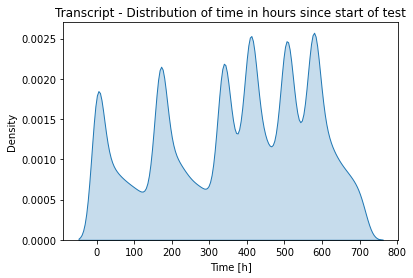

In [15]:
### line plot showing distribution of time
plt.figure(figsize = [6,4])
sns.distplot(transcript["time"], hist = False, kde_kws = {"shade": True})
plt.title("Transcript - Distribution of time in hours since start of test")
plt.xlabel("Time [h]");

<p>Explore transcript data set for one single customer: 
<ul>
    <li>view process with events and transactions of one customer for better understanding</li>
</ul>

In [16]:
### view all transcripts of one customer
single_customer = transcript[transcript["person"] == transcript["person"][0]]
display(single_customer)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


<p>The steps to complete an offer are explained according to the dataframe above for the customer "78afa995795e4d85b5d9ceeca43f5fef" with the offer "9b98b8c7a33c4b65b9aebfe6a799e6d9" (BOGO: difficulty 5 USD, reward 5 USD, duration 7 days):
<ol>
    <li>time 0 hours: offer was received by customer</li>
    <li>time 6 hours: offer was viewed by customer</li>
    <li>time 132 hours: customer made a purchase with a transaction of 19.89 USD</li>
    <li>time 132 hours: as the transaction was above 5 USD and prior 7 days (168 hours) from offer receive, the offer was completed and the customer got a reward of 5 USD</li>
</ol>

<p>The promotional offer campaign is always successful when the customer first views and then completes the offer. 

<p>Explore missing and dulicated data: 
<ul>
    <li>check for missing data</li>
    <li>check for dulicated data</li>
</ul>

In [17]:
### display proportion of missing data for all selected columns
display(transcript.isnull().sum())

person    0
event     0
value     0
time      0
dtype: int64

<h4>Data understanding of transcript data set</h4>
<p>Data set containing records for transactions, offers received, offers viewed, and offers completed:   
<ul>
    <li>event (str): record description (categories: transaction, offer received, offer viewed, offer competed)</li>
    <li>person (str): customer id</li>
    <li>time (int): time in hours since start of test beginning at t=0</li>
    <li>value (dict of strings): either an offer id or transaction amount in USD depending on the record</li>
</ul>

<p>Observations:
<ul>
    <li>306,534 rows and 4 columns</li>
    <li>no missing values</li>
    <li>duplicated rows 374 to be removed</li>
</ul>

## 3 Data Preparation <a class='anchor' id='data_preparation'></a>

### 3.1 Cleaning and Engineering data

<p>We perform cleaning and engineering for all data sets (portfolio, profile, transcript). In particular we focus on following working steps:
    
<ul>
    <li>change alphanumerical ids (offer and customer) to more readable code with integers</li>
    <li>convert dtype of features where necessary</li>
    <li>drop rows with missing data or outliers</li>
    <li>drop rows with duplicated data</li>
    <li>group data for further data analysis</li>
    <li>create new features with binaries from categorical variables</li>
</ul>

#### 3.1.1 portfolio

<p>Offer id is a long and difficult to read alphanumerical string. 
We will map this alphanumerical string to more readable ID code with integers.

In [18]:
def create_new_ids(id_series):
    """
    Method for creating new and more readable ID codes (integers) 
    by taking exisitng IDs and adding new IDs starting with number 1.

    Args:
        id_series (pd.DataSeries): Dataframe column with existing IDs

    Returns:
        ids: arrays with existing and new altered IDs
    """

    ids, idn = dict(), 1
    for i in id_series.unique():
        ids[i] = idn
        idn += 1
    return ids

### create mapping for offer ID
offer_id_mapping = create_new_ids(portfolio["id"])

### map offer IDs in offer metadata to integers
portfolio["offer_id"] = portfolio["id"].map(offer_id_mapping)

### drop column with old alphanumerical id
portfolio.drop("id", axis = 1, inplace = True)

### change the duration from day to hour
portfolio["duration"] = portfolio["duration"] * 24

### sort portfolio dataframe order of reward size: bogo - discount - informational
portfolio.sort_values(["offer_type", "difficulty", "duration"], ascending = [True, True, True], inplace = True)
display(portfolio)

,reward,channels,difficulty,duration,offer_type,offer_id
8,5,"[web, email, mobile, social]",5,120,bogo,9
3,5,"[web, email, mobile]",5,168,bogo,4
1,10,"[web, email, mobile, social]",10,120,bogo,2
0,10,"[email, mobile, social]",10,168,bogo,1
5,3,"[web, email, mobile, social]",7,168,discount,6
9,2,"[web, email, mobile]",10,168,discount,10
6,2,"[web, email, mobile, social]",10,240,discount,7
4,5,"[web, email]",20,240,discount,5
7,0,"[email, mobile, social]",0,72,informational,8
2,0,"[web, email, mobile]",0,96,informational,3


<h4>Data Engineering steps of portfolio data set</h4>

<ul>
    <li>map offer IDs from alphanumerical unreadable code to integers and remove old offer id column</li>
    <li>change duration value from days to hours</li>
    <li>sort rows according offer_type, difficulty and duration</li>
</ul>

#### 3.1.2 profile

Identify rows with missing user values (gender, income, age = 118) and remove these rows.

In [19]:
### Create array with users containing missing data (gender)
missing_users = profile.loc[profile.gender.isnull(), "id"].values

### drop all rows containing missing data
profile.dropna(inplace=True)
display(profile.shape)

(14825, 5)

<p>User id is a long and difficult to read alphanumerical string. 
We will map this alphanumerical string to more readable ID code with integers.

In [20]:
### create mapping for user ID
user_id_mapping = create_new_ids(profile["id"])

### map user IDs in user metadata to integers
profile["customer_id"] = profile["id"].map(user_id_mapping)

### drop column with old alphanumerical id
profile.drop("id", axis = 1, inplace = True)
#profile.head(1)

<p>Create new features: 
<ul>
    <li>add dummy columns with binaries of gender categories</li>
    <li>add categorical feature with predefined income ranges</li>
    <li>add categorical feature with predefined age groups</li>
</ul>

In [21]:
### add dummy columns for gender type categories. 
dummies_gender = pd.get_dummies(profile["gender"], columns = ["gender"])
profile = pd.concat([profile, dummies_gender.set_index(profile.index)], axis = 1)

### convert Dtype from float64 to int64 in column "income"
profile["income"] = profile.income.astype(int)

### add new column income_range with category of income ranges
profile["income_range"] = pd.cut(profile["income"], bins=[29900, 45000, 60000, 75000, 90000, 105000, 120100],
                                 labels=["30k-45k", "45k-60k", "60k-75k", "75k-90k", "90k-105k", "105k-120k"])

### add new column age_group with category of age groups
profile["age_group"] = pd.cut(profile["age"], bins=[17, 25, 35, 45, 55, 65, 105],
                                 labels=["18-25", "25-35", "35-45", "45-55", "55-65", ">65"])

display(profile.head(1), profile.shape)

,gender,age,became_member_on,income,customer_id,F,M,O,income_range,age_group
1,F,55,2017-07-15,112000,1,1,0,0,105k-120k,45-55


<h4>Data Engineering steps of profile data set</h4>

<ul>
    <li>remove rows with missing information (gender, age = 118, income)</li>
    <li>map user IDs from alphanumerical unreadable code to integers and remove old user id column</li>
    <li>create dummy variables with binaries of gender column</li>
    <li>convert dtype of income column from float64 to int64</li>
    <li>create new feature with income range</li>
    <li>create new feature with age group</li>
</ul>

#### 3.1.3 transcript

<p>Remove data with missing customer entries and change customer id alphanumerical string to more readable ID code with integers:

In [22]:
### identify events of customers with missing data (gender, age, income)
missing_user_events = transcript[transcript.person.isin(missing_users)].index.values
### drop events with missing customer data
transcript.drop(missing_user_events, inplace = True) # drop events

### map user IDs in offer metadata to integers
transcript["customer_id"] = transcript["person"].map(user_id_mapping)
### drop column with ld alphanumerica id
transcript.drop("person", axis = 1, inplace = True)
#transcript.head(1)

<p>Create new features: 
<ul>
    <li>unpack categorical variables of value column</li>
    <li>create dummy variables with binaries of value column (categories: offer_id, reward, amount) and remove value column</li>
    <li>map alphanumerical offer id string to more readable ID code with integers</li>
    <li>create dummy variables with binaries of event column</li>
</ul>

In [23]:
### create empty arrays for categorical values (offer_id, reward and amount) 
value_cols={"offer_ids": [], "reward": [], "amount": []}

### iterate through value column, look for categorical variables 
### and store those in new columns (offer_ids, reward and amount)
for row in transcript.itertuples():
    ### create empty lists for categorical values (offer_id, reward and amount)
    offer_id = None
    reward = None
    amount = None
    
    ### categorical variable offer_id is written in two spellings (offer_id and offer id) which are both the same
    if "offer_id" in row.value.keys():
        offer_id = row.value["offer_id"]
    if "offer id" in row.value.keys():
        offer_id = row.value["offer id"]
    if 'reward' in row.value.keys():
        reward = row.value["reward"]
    if 'amount' in row.value.keys():  
        amount = row.value["amount"]
    
    ### store values in new columns (offer_ids, reward and amount)
    value_cols["offer_ids"].append(offer_id)
    value_cols["reward"].append(reward)
    value_cols["amount"].append(amount)

### Add new columns (offer_ids, reward and amount) to transcript dataframe and drop value column
transcript = pd.concat([transcript, pd.DataFrame(value_cols).
                        set_index(transcript.index)], axis=1).drop(columns=["value"])

### map offer IDs to integers and delete helper offer_ids column
transcript["offer_id"] = transcript["offer_ids"].map(offer_id_mapping)
del transcript["offer_ids"]

### add dummy columns for event type categories.
dummies_event = pd.get_dummies(transcript["event"], columns = ["event"])
transcript = pd.concat([transcript, dummies_event.set_index(transcript.index)], axis=1)

<p>Remove dulicated data: 
<ul>
    <li>identify duplicated rows</li>
    <li>drop duplicated rows</li>
</ul>

In [24]:
### identify duplicated data (duplicated events):
number_duplicated = transcript.duplicated().sum()
print("Duplicated events:", number_duplicated)

### prepare df with duplicated events for checking
duplicated_events = transcript[transcript.duplicated(keep=False)]
duplicated_events_value_counts = duplicated_events["event"].value_counts()
display(duplicated_events.head(), duplicated_events_value_counts)

Duplicated events: 374


,event,time,customer_id,reward,amount,offer_id,offer completed,offer received,offer viewed,transaction
66122,offer completed,168,1271,2.0,NaN,10.0,1,0,0,0
66123,offer completed,168,1271,2.0,NaN,10.0,1,0,0,0
66782,offer completed,168,3872,10.0,NaN,1.0,1,0,0,0
66783,offer completed,168,3872,10.0,NaN,1.0,1,0,0,0
67613,offer completed,168,7462,5.0,NaN,4.0,1,0,0,0


offer completed    747
Name: event, dtype: int64

<p>There are totally 374 duplicated events only with offers beeing completed. This looks like an error at data insertation because the events were all documented at the same time and it is unlikely that one user completes one offer type twice. As this is a data entry error we will remove these duplicates. 

In [25]:
### Drop duplicated events
transcript.drop_duplicates(inplace=True)
number_duplicated_new = transcript.duplicated().sum()
print("Duplicated events:", number_duplicated_new)

Duplicated events: 0


<p>Check missing values in transcript dataframe after data engineering.

In [26]:
### display proportion of missing data for all selected columns
display(transcript.isnull().sum())

event                   0
time                    0
customer_id             0
reward             240318
amount             148431
offer_id           123957
offer completed         0
offer received          0
offer viewed            0
transaction             0
dtype: int64

<p>We have missing values in columns reward, amount and offer_id. This are the created dummy features from the value column.
<p>We will keep all missing values due to following reasons:
<ul>
    <li>for event "offer_received" and "offer_viewed" there is no reward and no amount</li>
    <li>for the event "offer_completed" there is no transaction and no amount</li>
    <li>for the event "transaction" there is no offer_id and no reward corresponding to any transaction</li>
</ul>
<p>All missing data (NaN) will be replaced in a further step by 0.0.

<h4>Data Engineering steps of transcript data set</h4>

<ul>   
    <li>drop rows with missing user information (gender, age = 118, income) in profile dataframe</li>
    <li>map customer IDs from alphanumerical unreadable code to integers and remove old customer id column</li>
    <li>create dummy variables with binaries of value column</li>
    <li>create dummy variables with binaries of event column</li>
    <li>map offer IDs from alphanumerical unreadable code to integers and remove old offer id column (initially value column)</li>
    <li>remove 374 duplicated events</li>
</ul>

#### 3.1.4 master

<p>Finally we create a master dataframe where we merge data of transcript (transaction), profile (demographic) and portfolio (offer) with the goal to use it for exploratory data analysis and modeling. Here we perform following steps:

<ul>
    <li>create promotion_success dataframe on basis of transcript dataframe with one row per offer id and per customer containing information of several events (offer received, offer_viewed, offer_completed, treansaction)</li>
    <li>replace NaN values with 0.0</li>
    <li>create new feature promotion_success with binaries (1 for promotion was successfull and 0 for not successful)</li>
    <li>take promotion_success dataframe and merge portfolio dataframe on offer_id</li>
    <li>merge profile dataframe on cutomer_id</li>
    <li>rename column names</li>
</ul>

In [27]:
### create new dataframe
promotion_success = transcript.groupby(["customer_id", "offer_id", "event"])["time"].count().unstack()   
promotion_success.reset_index(level=[0,1],inplace = True)
    
### Replace NaN values with 0.0   
promotion_success.fillna(0.0, inplace = True)

### create new feature promotion_success with binaries
### promotion is only successfull in case offer was viewed and completed, otherwise sended offer had no influence
### promotion_success will be computed: offer completed * offer viewed (1 for success and 0 for no success)
### in case one customer received during the testing period the same offer multiple times 
### it will be considered as success if customer completed at least one time the offer
promotion_success["promotion success"] = promotion_success["offer completed"] * promotion_success["offer viewed"]
promotion_success["promotion success"] = promotion_success["promotion success"].map(lambda x: 0 if x == 0.0 else 1)
promotion_success.drop(["offer completed", "offer viewed", "offer received"], axis = 1, inplace = True)

display(promotion_success.head(1))

event,customer_id,offer_id,promotion success
0,1,3.0,0


In [28]:
### create master from promotion_success dataframe and merge portfolio and profile dataframes
master = promotion_success.merge(portfolio, how ="left", on = "offer_id")
master = master.merge(profile, how ="left", on ="customer_id")   

### delete channels column
del master["channels"]

### rename column names
master.rename(columns={"F": "gender F", "M": "gender M", "O": "gender O", 
                       "duration": "duration (hrs)", "reward": "reward (USD)", 
                       "difficulty": "difficulty (USD)", "income": "income year (USD)"}, inplace=True)
display(master.head())

,customer_id,offer_id,promotion success,reward (USD),difficulty (USD),duration (hrs),offer_type,gender,age,became_member_on,income year (USD),gender F,gender M,gender O,income_range,age_group
0,1,3.0,0,0,0,96,informational,F,55,2017-07-15,112000,1,0,0,105k-120k,45-55
1,1,4.0,0,5,5,168,bogo,F,55,2017-07-15,112000,1,0,0,105k-120k,45-55
2,2,1.0,1,10,10,168,bogo,F,75,2017-05-09,100000,1,0,0,90k-105k,>65
3,2,4.0,1,5,5,168,bogo,F,75,2017-05-09,100000,1,0,0,90k-105k,>65
4,2,8.0,0,0,0,72,informational,F,75,2017-05-09,100000,1,0,0,90k-105k,>65


<p>We grouped the master dataframe so that we have in the end one single row for each combination of customer id and offer id which represents one complete promotion. Promotion is only successful when offer was viewed and completed by the customer. We added new feature promotion_success with 1 for success and 0 for no success. In case one customer received during the testing period the same offer multiple times, promotion success will be determined as successful if customer completed at least one time the offer.

### 3.2 Save data

In [29]:
### save dataframe as pkl file
#portfolio.to_pickle("data/data_prep/portfolio.pkl")
#profile.to_pickle("data/data_prep/profile.pkl")
#transcript.to_pickle("data/data_prep/transcript.pkl")
#master.to_pickle("data/data_prep/master.pkl")

### 3.3 Summary Data Preparation

<p>We have performed data cleaning and data engineering on the data sets portfolio, profile and transcript. Then, as final product, we prepared master dataframe for exploratory data analysis and modeling. Here is an abstract of the master dataframe content: 
    
<ul>
    <li>customer_id (int): customer id with transformed easy to read integers</li>
    <li>offer_id (float): offer id with transformed easy to read integers</li>
    <li>promotion success (int): new feature with binaries (1 for promotion was successful and 0 for not successful) which will be used as target variable in the modeling part</li>
    <li>reward (USD) (int): reward given for completing an offer in USD</li>    
    <li>difficulty (USD) (int): minimum required spend to complete an offer in USD</li>
    <li>duration (hrs) (int): time in hours for offer to be opened</li>
    <li>offer_type (str): information about offer types (BOGO, discount, informational)</li>
    <li>gender (str): information about gender of the customer (M, F, O)</li>
    <li>age (int): age of the customer</li>
    <li>became_member_on (datetime): date when customer created an app account</li>
    <li>income (USD) (float): yearly customer's income</li>
    <li>gender F (int): new feature with binaries (1 for customer is female and 0 for no female) which will be used as feature variable in the modeling part</li>
    <li>gender M (int): new feature with binaries (1 for customer is male and 0 for no male) which will be used as feature variable in the modeling part</li>
    <li>gender O (int): new feature with binaries (1 for customer is others and 0 for male or female) which will be used as feature variable in the modeling part</li>
    <li>income_range (str): new categorical variable with income range which will be used in the explanatory analysis part</li>
    <li>age_group (str): new categorical variable with age group which will be used in the explanatory analysis part</li>   
</ul>

## 4 Exploratory Data Analysis<a class='anchor' id='exploratory_data_analysis'></a>

<p>In this chapter we will answer following business questions using exploratory analysis and statistics:
<ol>
    <li>Can we find relationships between customer demographic group age and income?
    <li>How are offer types distributed in data set related to customer demographics age, income and gender?</li>
    <li>Which are the most popular offers?</li>
    <li>Are there significant differences in age, income and registration date for promotion success?</li>  
</ol>

In [30]:
### import data
#master = pd.read_pickle("data/data_prep/master.pkl")

### 4.1 Question 1: Can we find relationships between demographic group age and income?

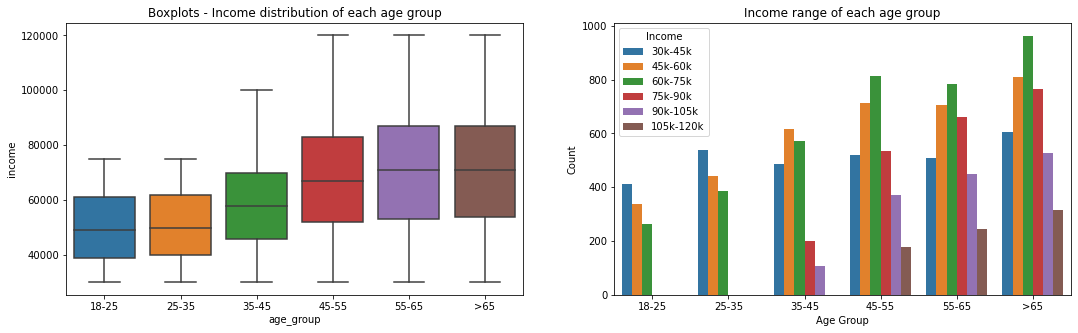

In [31]:
### make plot with 2 frames
plt.figure(figsize = [18, 5])

### left plot: Boxplot for each age group with distribution of income
plt.subplot(1, 2, 1)
### Types of age groups
age_groups = ["18-25", "25-35", "35-45", "45-55", "55-65", ">65"]
### Returns the types for age_groups with the categories and orderedness
age = pd.api.types.CategoricalDtype(ordered=True, categories=age_groups)
### Use pandas.astype() to convert the "age" column from a plain object type into an ordered categorical type 
profile["age_group"] = profile["age_group"].astype(age)

sns.boxplot(data = profile, x = "age_group", y = "income")
plt.title("Boxplots - Income distribution of each age group");

### right plot: clustered bar chart of categorical variables age and income range
plt.subplot(1, 2, 2)
sns.countplot(x = "age_group", hue = "income_range", data = profile)
plt.title("Income range of each age group")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.legend(title="Income")
plt.show();

<p>In general young people and career starters have less income than elder people in working age. Here we want to check if this is true for the sample of customers where we have information on their age and yearly income.
<p>We can observe as follows:
<ul>
    <li>as higher the age group as more customers are included in the data set (see right chart)</li>
    <li>there is no customer younger than 35 with an yearly income above 75k USD</li>
    <li>there is no customer younger than 45 with an yearly income above 105k USD</li>
    <li>in age groups 18-25 and 25-35 the mode of the customer distribution is at the lowest income range 30k-45k USD</li>
    <li>in the age groups 45-55, 55-65 and >65 the mode of the customer distribution is in income range 60k-75k USD</li>
    <li>in the age groups 35-45 and above the higher income ranges 75k-90k, 90k-105k and 105k-120k increase with each age group (see right chart)</li>
</ul>   
    
<p>There are more elder than young customers included in the data set. Generally as higher the age group as higher gets the yearly income. Thus the given customer data seems to represent a realsitic population distribution in relation of age and income.

### 4.2 Question 2: How are offer types distributed in data set related to customer demographics age, income and gender?

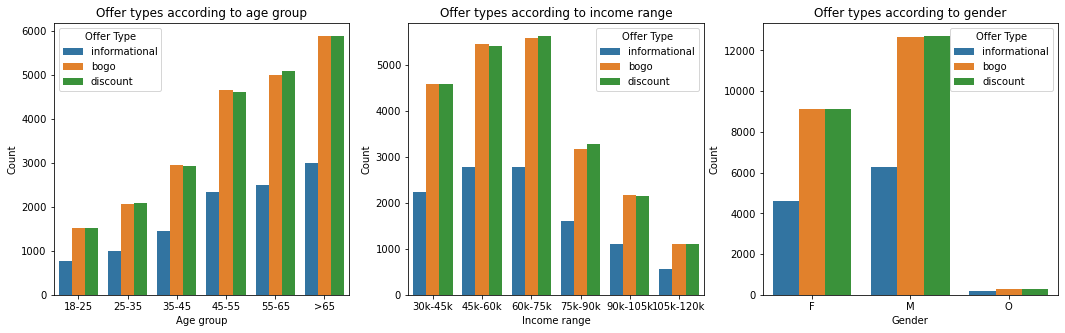

In [32]:
### make plot with 3 frames
plt.figure(figsize = [18, 5])

### left plot: clustered bar chart with most popular offers in various age groups
plt.subplot(1, 3, 1)
sns.countplot(x = "age_group", hue = "offer_type", data = master)
plt.title("Offer types according to age group")
plt.ylabel("Count")
plt.xlabel("Age group")
plt.legend(title = "Offer Type");

### central plot: clustered bar chart with most popular offers in various income groups
plt.subplot(1, 3, 2)
sns.countplot(x = "income_range", hue = "offer_type", data = master)
plt.title("Offer types according to income range")
plt.ylabel("Count")
plt.xlabel("Income range")
plt.legend(title = "Offer Type");

### right plot: clustered bar chart with most popular offers distibuted to gender
plt.subplot(1, 3, 3)
sns.countplot(x = "gender", hue = "offer_type", data = master)
plt.title("Offer types according to gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.legend(title = "Offer Type");

<p>Here we want to check the distribution of offer types (informational, bogo, discount) according to customer age group, income range and gender. Can we find any patterns on how the offers were transmitted (event: offer received) to the customers?
<p>We can observe as follows:
<ul>
    <li>offer types bogo and discount are approximately same size for all age, income and gender categories while offer type informational is appr. half of their size. The reason therefore is because all offers were sent to customers in a similar size. Moreover there are only 2 informational offers in the portfolio while bogo and discount have each 4 offers.</li>  
    <li>the elder the age group the more customers are included in the data set</li>
    <li>most of the customer have a middle income range of 60k-75k</li>
    <li>there is a significant imbalance in gender: there are far more male customers than female while only a small proportion hasn't declared a gender</li>
</ul>   

### 4.3 Question 3: Which are the most popular offers?

,promotion success,0,1,total counts,success_rate [%]
offer_id,offer_type,,,,
7.0,discount,1390.0,4154.0,5544.0,74.93
6.0,discount,1445.0,4062.0,5507.0,73.76
9.0,bogo,1964.0,3481.0,5445.0,63.93
2.0,bogo,2706.0,2805.0,5511.0,50.90
1.0,bogo,2751.0,2813.0,5564.0,50.56
4.0,bogo,3145.0,2397.0,5542.0,43.25
10.0,discount,3145.0,2335.0,5480.0,42.61
5.0,discount,4136.0,1452.0,5588.0,25.98
3.0,informational,5524.0,0.0,5524.0,0.00


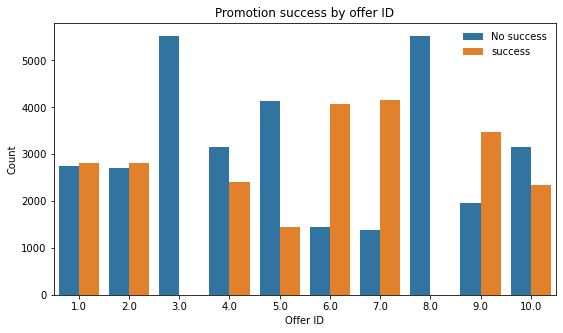

In [33]:
### prepare dataframe with success rate of each offer
success_rate = master.groupby(["offer_id", "offer_type", "promotion success"])["promotion success"].count().unstack()
### Replace NaN values with 0.0   
success_rate.fillna(0.0, inplace = True)
### add new colun with total counts (offer success 0 + 1) per offer
success_rate["total counts"] = success_rate[0]+success_rate[1]
### add new colun with offer success rate in percent per offer
success_rate["success_rate [%]"] = (100 * success_rate[1]/success_rate["total counts"]).round(2)
display(success_rate.sort_values("success_rate [%]", ascending = False))

plt.figure(figsize = [9, 5])

### promotion success by offer id
#plt.subplot(1, 2, 1)
sns.countplot(x = "offer_id", hue = "promotion success", data = master)
plt.title("Promotion success by offer ID")
plt.ylabel("Count")
plt.xlabel("Offer ID")
plt.legend(["No success", "success"], frameon = False);

### Right plot: promotion success by offer id
#plt.subplot(1, 2, 2)
#sns.barplot(success_rate.index.values, success_rate["success_rate [%]"], color = "grey")
#plt.title("Promotion success rate by offer ID")
#plt.ylabel("Success rate [%]")
#plt.xlabel("Offer ID")
#plt.show();

<p>Here we compare counts of completed offers (success) with counts of not completed offers (no success) for each offer id. Furthermore we compute a success rate for each offer.

<p>We can observe as follows:
<ul>
    <li>offer 3 and 8 are informational offers where a completion of the offer with a reward is not forseen and therefore the success rate is always 0. In the modeling part we will not consider those two offers</li>
    <li>offer 1 and 2 are bogo offers where success and no success are roughly equal</li>
    <li>offer 4 and 9 are bogo offers with an imbalance between success and no success</li>
    <li>offer 10 is a discount offer with an imbalance between success and no success</li>
    <li>offer 5,6 and 7 are discount offers with a heavy imbalance between success and no success</li>
    <li>most popular offers are offer 7 and 6 while the least popular offer is offer 5</li>
</ul>

### 4.4 Question 4: Are there significant differences in age, income and registration date for promotion success?

<p>Here we will explore if there is a significant difference between the distribution means of successful and unsuccessful promotions for the demographics age, income and registration date. We will use significance testing (t-testing) to determine whether the relationship of the two samples (success and no success of demographic) is caused by something other than chance. One precondition will be to have large sample size for each group so that the t-test will also be valid for non normal distributions.

<ul>
    <li>for normal distributions and non-normal distributions (large sample size) with equal variances: independent t-test [3]</li>
    <li>for normal distributions and non-normal distributions (large sample size) with unequal variances: Welch's t-test [4]</li>
</ul>

<p>Below are the helper functions we will use for performing the statistical comparison on the distributions of the demographics age, income and registration date:

In [34]:
def is_equal_variance(d1, d2, alpha):
    """
    Method for performing stats.levene test on two input samples. 
    As returns we get a boolian if sample variances are equal.

    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 

    Returns:
        boolian: true if variances between input distributions are equal (p > alpha), false otherwise (p <= alpha)
        W: test statistic as float
        p: p value for the test
    """
    ### check if variances are equal   
    W, p = stats.levene(d1, d2)
    if p <= alpha:
        print(f"group variances unequal: W = {W:.4f}, p = {p:.4f}")
        return False        
    else:
        print(f"group variances equal: W = {W:.4f}, p = {p:.4f}")
        return True

In [35]:
def are_normal(d1, d2, alpha):
    """
    Method for performing stats.normaltest on two input samples and returns boolian if sample distibutions are normal 
    As return we get a boolian if sample distibutions are normal.

    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 

    Returns:
        boolian: true if sample distributions are normal (p > alpha), false otherwise (p <= alpha)
    """
    ### check if sample distributions are normal   
    for d in [d1, d2]:
        k2, p = stats.normaltest(d)
        if p <= alpha:
            print(f"sample distribution not normal")
            return False
    return True

In [36]:
def t_test(d1, d2, alpha):
    """
    Method for performing t-test on two sample distributions:
        Welch's t-test for unequal variance
        independent t-test for equal variance 
    For non-normal distributions of groups, sample size has to be of large size (appr. > 50) 
    to get a valid t-test on a non normal distribution.
        
    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 
    
    Returns:
        statistic (float): test statistic
        p (float): p value for marginal significance
        interpretation (string): interpretation of statistical significance for the two means
    """
    ### check of equal variance
    equal_var = is_equal_variance(d1, d2, alpha)
    
    ### check if group values are normally distributed
    normal = are_normal(d1, d2, alpha)    
    
    ### select appropriate test
    if not equal_var:
        print("Welch's t-test on non-normal distributed samples with unequal variances:")
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var)
    else:
        print("Independent t-test:")
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var) 
        
    ### t-test interpretation 
    significant = "statistically significant" if p <= alpha else "not statistically significant"
    interpretation = f"mean difference between groups is {significant}."
    
    return statistic, p, interpretation 

In [37]:
def compare_group_means(d1, d2, alpha):
    """
    Method for performing sample means comparison with statistics summary of samples, 
    mean difference calulation, effect size test and t-test. 
    
    Args:
        d1, d2 (pd.DataSeries): input sample data
        alpha (float): alpha value as proportion 
    
    Returns: 
        print statements for statistics of samples, mean difference calulation, effect size test and t-test
    """
    
    ### aggregate statistics
    print ("sample statistics:")
    d1_describe = d1.agg(["count", "mean", "median", "std"])
    d2_describe = d2.agg(["count", "mean", "median", "std"])
    display(d1_describe, d2_describe)
    
    ### calculate difference between group means
    diff = d1.mean() - d2.mean()
    diffp = 100.0 * abs(diff) / d1.mean()
    print(f"mean difference between groups: {diff:.4f}({diffp:.2f}%)\n")
    
    ### Perform t-test
    statistic, p, interpretation = t_test(d1, d2, alpha)
    print(f"statistic = {statistic:.4f} | p-value = {p:.4f} =>> {interpretation}")

In [38]:
### prepare data series for statistical examination
income_1 = master[master["promotion success"] == 1]["income year (USD)"]
income_0 = master[master["promotion success"] == 0]["income year (USD)"]

### print results of comparison between customer income with and without promotion success 
print("Income - group means comparison between success and no success of promotion offer")
display(compare_group_means(income_1, income_0, alpha = 0.05))

Income - group means comparison between success and no success of promotion offer
sample statistics:


count     23499.000000
mean      69043.235882
median    68000.000000
std       21184.190826
Name: income year (USD), dtype: float64

count     31723.000000
mean      62681.398355
median    60000.000000
std       21552.585232
Name: income year (USD), dtype: float64

mean difference between groups: 6361.8375(9.21%)

group variances equal: W = 1.5543, p = 0.2125
sample distribution not normal
Independent t-test:
statistic = 34.5457 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

In [39]:
### prepare data series for statistical examination
age_1 = master[master["promotion success"] == 1]["age"]
age_0 = master[master["promotion success"] == 0]["age"]

### print results of comparison between customer income with and without promotion success 
print("Age - group means comparison between success and no success of promotion offer")
display(compare_group_means(age_1, age_0, alpha = 0.05))

Age - group means comparison between success and no success of promotion offer
sample statistics:


count     23499.000000
mean         55.744925
median       56.000000
std          16.703987
Name: age, dtype: float64

count     31723.000000
mean         53.316647
median       54.000000
std          17.815811
Name: age, dtype: float64

mean difference between groups: 2.4283(4.36%)

group variances unequal: W = 174.9573, p = 0.0000
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = 16.4165 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

In [40]:
### convert Dtype from datetime64 to ordinal
registration_data = master.copy()
registration_data["became_member_on"] = registration_data["became_member_on"].map(datetime.datetime.toordinal)

### prepare data series for statistical examination
registration_date_1 = registration_data[registration_data["promotion success"] == 1]["became_member_on"]
registration_date_0 = registration_data[registration_data["promotion success"] == 0]["became_member_on"]

### print results of comparison between customer income with and without promotion success 
print("Registration date - group means comparison between success and no success of promotion offer")
display(compare_group_means(registration_date_1, registration_date_0, alpha = 0.05))

Registration date - group means comparison between success and no success of promotion offer
sample statistics:


count      23499.000000
mean      736312.616367
median    736385.000000
std          402.905711
Name: became_member_on, dtype: float64

count      31723.000000
mean      736429.441194
median    736593.000000
std          424.326185
Name: became_member_on, dtype: float64

mean difference between groups: -116.8248(0.02%)

group variances unequal: W = 59.0904, p = 0.0000
sample distribution not normal
Welch's t-test on non-normal distributed samples with unequal variances:
statistic = -32.9328 | p-value = 0.0000 =>> mean difference between groups is statistically significant.


None

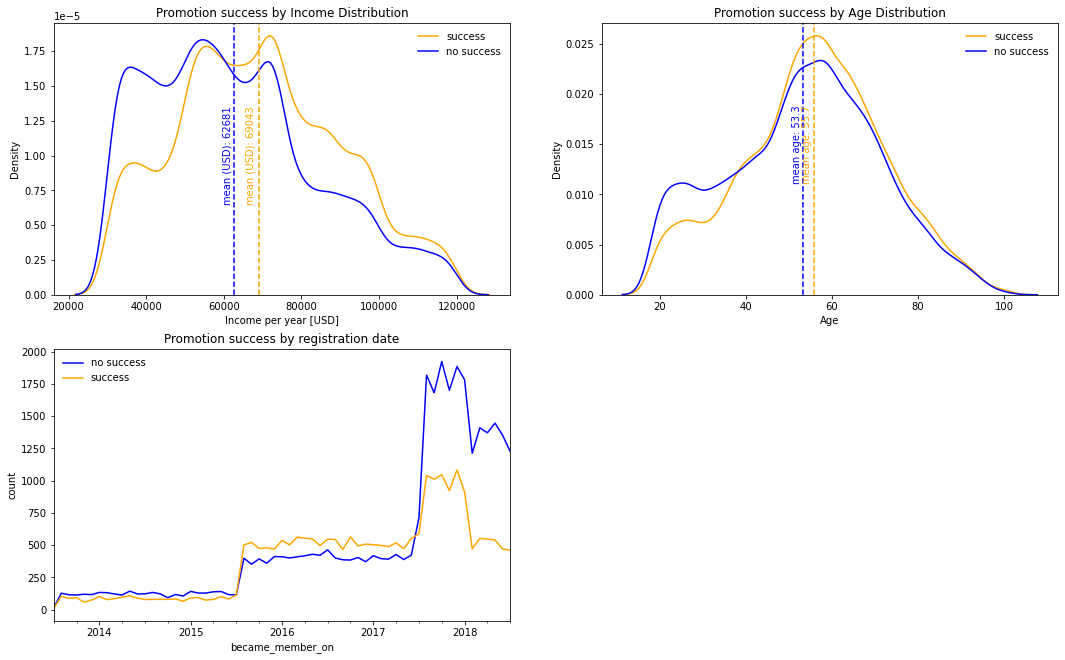

In [41]:
### make plot with 3 frames
plt.figure(figsize = [18, 11])

### left plot top: promotion success by customer's income
plt.subplot(2, 2, 1)
sns.distplot(master.loc[master["promotion success"] == 1]["income year (USD)"], 
             hist = False, color = "orange", kde_kws = {'shade': False})
sns.distplot(master.loc[master["promotion success"] == 0]["income year (USD)"], 
             hist = False, color = "blue", kde_kws = {'shade': False})
plt.xlabel("Income per year [USD]")
plt.title("Promotion success by Income Distribution")
plt.legend(["success", "no success"], frameon = False)
plt.axvline(x = master[master["promotion success"] == 1]["income year (USD)"].mean(), 
            color = "orange", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * master.loc[master["promotion success"] == 1]["income year (USD)"].mean(), 0.00001, 
         f'mean (USD): {master.loc[master["promotion success"] == 1]["income year (USD)"].mean():.0f}', 
         rotation = 90, verticalalignment = "center", color = "orange")
plt.axvline(x = master[master["promotion success"] == 0]["income year (USD)"].mean(), 
            color = "blue", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * master.loc[master["promotion success"] == 0]["income year (USD)"].mean(), 0.00001, 
         f'mean (USD): {master.loc[master["promotion success"] == 0]["income year (USD)"].mean():.0f}', 
         rotation = 90, verticalalignment = "center", color = "blue");

### right plot top: promotion success by customer's age
plt.subplot(2, 2, 2)
sns.distplot(master.loc[master["promotion success"] == 1]["age"], 
             hist = False, color = "orange", kde_kws = {'shade': False})
sns.distplot(master.loc[master["promotion success"] == 0]["age"], 
             hist = False, color = "blue", kde_kws = {'shade': False})
plt.xlabel("Age")
plt.title("Promotion success by Age Distribution")
plt.legend(["success", "no success"], frameon = False)
plt.axvline(x = master[master["promotion success"] == 1]["age"].mean(), 
            color = "orange", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * master.loc[master["promotion success"] == 1]["age"].mean(), 0.015, 
         f'mean age: {master.loc[master["promotion success"] == 1]["age"].mean():.1f}', 
         rotation = 90, verticalalignment = "center", color = "orange")
plt.axvline(x = master[master["promotion success"] == 0]["age"].mean(), 
            color = "blue", linestyle = "dashed", linewidth = 1.5)
plt.text(0.95 * master.loc[master["promotion success"] == 0]["age"].mean(), 0.015, 
         f'mean age: {master.loc[master["promotion success"] == 0]["age"].mean():.1f}', 
         rotation = 90, verticalalignment = "center", color = "blue");

### left plot bottom: promotion success by customer's registration date
plt.subplot(2, 2, 3)
### specify Grouper for monthly counts of registrations
monthly_reg_0 = master[master["promotion success"] == 0].groupby([pd.Grouper(key="became_member_on", 
                                                                             freq="M")])["became_member_on"].count()
monthly_reg_1 = master[master["promotion success"] == 1].groupby([pd.Grouper(key="became_member_on", 
                                                                             freq="M")])["became_member_on"].count()
### show line chart with registration date development
monthly_reg_0.plot(title = "Promotion success by registration date", 
                   ylabel = "count", color = "blue")
monthly_reg_1.plot(ylabel = "count", color = "orange")
plt.legend(["no success", "success"], frameon = False);

<h4>Income</h4>
<ul>
    <li>samples for success (n = 23,499) and no success (n = 31,723) are of large size and not normally distributed</li>
    <li>mean yearly income for success group is 69,043 USD while for no success group it is 62,681 USD</li>
    <li>mean difference is 6,362 USD and is statistically significant (for p-value lower 0.05) between success and no success samples (i.e. the two samples are not from the same population as the mean difference is caused by something other than chance)</li>
    <li>the line chart shows that no success distribution of incomes is a positively skewed distribution while the success distribution of incomes tends to be a skew normally distribution</li>
</ul>

<p>We can observe that customers of the success group tend to have higher yearly income than customers of the no success group.
    
<h4>Age</h4>
<ul>
    <li>samples for success (n = 23,499) and no success (n = 31,723) are of large size and not normally distributed</li>
    <li>mean age for success group is 56 while for no success group it is 53 years</li>
    <li>mean difference is 2.4 years and is statistically significant (for p-value lower 0.05) between success and no success samples (i.e. the two samples are not from the same population as the mean difference is caused by something other than chance)</li>
    <li>the line chart shows that there is a hump of young customers in the no success distribution of age while the success distribution of age tends to be a skew normally distribution</li>
</ul>

<p>We can observe that customers of the success group tend to be older than customers of the no success group.

<h4>Registration date</h4>
<ul>
    <li>samples for success (n = 23,499) and no success (n = 31,723) are of large size and not normally distributed</li>
    <li>mean difference is statistically significant (for p-value lower 0.05) between success and no success samples (i.e. the two samples are not from the same population as the mean difference is caused by something other than chance)</li>
    <li>for success group slightly more customers inregistrated 2016 and 2017</li>
    <li>for no success group far more customers inregistrated 2018</li>
</ul>
<p>We can observe that customers with earlier registrations tend to take an promotional offer while customers who are registrated for short time tend to ignore the offers.

## 5 Modeling and Evaluation<a class='anchor' id='modeling_and_evaluation'></a>

<p>In this chapter we will build a model to predict which promotional offers will be successful when sending to new customer based on their age, income, registration date and gender. This will be the solution to business question 5 where the output will be for each offer and customer a binary with 1 for promotion success and 0 for no success.

<p>The modeling and evaluation steps are as follows:
<ul>
    <li><b>Preapre data frame for modeling:</b> split master into 8 pieces where for each offer id (only bogo and discount offer) one dataframe is created</li>
    <li><b>Select features:</b> select features with strong multicollinearity in realtion to target variable promotion success and prepare features data frame (X) and target data series (y)</li>
    <li><b>Scale features:</b> normalize features in range [0, 1] to bring every feature in same footing (essential for machine learning algorithm calculating distances between data)</li>
    <li><b>Train test split of data:</b> spilt data frames into train and test sets for validation purposes</li>
    <li><b>Pick and tune algorithm:</b> tune in total 6 algorithms on train data set for each single offer using GridSearchCV</li>
    <li><b>Validate and evaluate:</b> evaluate predictive performance of each algorithm using the test data set and compare evaluation metrics (Accuracy, F1-score, Recall, Precision) for each singe offer and finally choose algorithm with best predictive performance</li>
</ul>

### 5.1 Prepare data for modeling

In [42]:
### view first row of master dataframe and its shape
display(master.head(1), master.shape)

,customer_id,offer_id,promotion success,reward (USD),difficulty (USD),duration (hrs),offer_type,gender,age,became_member_on,income year (USD),gender F,gender M,gender O,income_range,age_group
0,1,3.0,0,0,0,96,informational,F,55,2017-07-15,112000,1,0,0,105k-120k,45-55


(55222, 16)

<p>Format data for modeling
<ul>
    <li>transform dtype of become_member_on column from datetime to ordinal</li>
</ul>

In [43]:
### convert Dtype from datetime64 to ordinal
master["became_member_on"] = master["became_member_on"].map(datetime.datetime.toordinal)

<p>We will predict promotion success for each single offer id of bogo and discount offers. Informational offers will be excluded as those cannot be completed and the target variable is always 0. Therefore we will create totally 8 dataframes each one only with of one single offer id. 

In [44]:
### create dataframes only with data of one single offer id 
master_offer1 = master[master['offer_id']==1.0]
master_offer2 = master[master['offer_id']==2.0]
master_offer4 = master[master['offer_id']==4.0]
master_offer5 = master[master['offer_id']==5.0]
master_offer6 = master[master['offer_id']==6.0]
master_offer7 = master[master['offer_id']==7.0]
master_offer9 = master[master['offer_id']==9.0]
master_offer10 = master[master['offer_id']==10.0]

#### 5.1.1 Feature selection

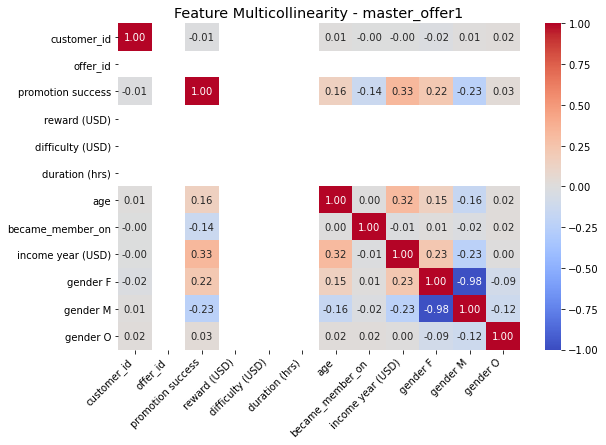

In [45]:
plt.figure(figsize=(9, 6))
### Plot Heatmap with feature multicollinearity
sns.heatmap(master_offer2.corr(), annot = True, vmin = -1, vmax = 1, fmt= ".2f", cmap = "coolwarm")
plt.title("Feature Multicollinearity - master_offer1", fontsize = "x-large")
plt.xticks(rotation = 45, ha = "right");

<p>As we want to predict promotion success we need suitable features for our algorithms. In the heatmap above we compare feature multicollinearity for all features in dataframe of one single offer (here we have choosen offer 2) in realtion to the target variable promotion success.

<p>We will select our features as follwos:
<ul>
    <li>customer_id is not a variable as it is just an id</li>
    <li>promotion_success is target variable</li>
    <li>reward, difficulty, duration, are variables which are for each individual offer_id always the same and therefore there is no multicollinearity and these variables wont influence the predictive performance</li>
    <li>age, become_member_on, income and gender have linear correlation to target variable promotion success and will be selected as featrues for prediction</li>
</ul>

<p>Finally we prepare features data frame (X) and target data series (y) for each offer id.

In [46]:
### select target variable
target_col = ["promotion success"]

### select feature varibles
features_col = ["age", "became_member_on", "income year (USD)", 
                "gender F", "gender M", "gender O"]

def split_features_target(df, features_col, target_col):
    """
    Method for filtering features and target Series from master dataframe

    Args:
        df (pd.DataFrame): master Dataframe containing feature and target columns 
        features_col (list): list with selected features column names
        target_col (list): list with selected target column name

    Returns:
        X (pd.DataFrame): DataFrame with selected feature columns
        y (pd.DataSeries): Series with selected target column
    """
    X = df[features_col]
    y = df[target_col]
    return X, y

### prepare dataframes X with feature variables and data Series y with target variable  
X1, y1 = split_features_target(master_offer1, features_col, target_col)
X2, y2 = split_features_target(master_offer2, features_col, target_col)
X4, y4 = split_features_target(master_offer4, features_col, target_col)
X5, y5 = split_features_target(master_offer5, features_col, target_col)
X6, y6 = split_features_target(master_offer6, features_col, target_col)
X7, y7 = split_features_target(master_offer7, features_col, target_col)
X9, y9 = split_features_target(master_offer9, features_col, target_col)
X10, y10 = split_features_target(master_offer10, features_col, target_col)

#### 5.1.2 Scale features

<p>It is essential for machine learning algorithms which are calculating distances between data to have normalized features. Therefore we will normalize the age, become_member_on and income in range [0, 1] to bring all features in same footing.

In [47]:
### select feature varibles for MinMax scaling
normalize_col = ["age", "became_member_on", "income year (USD)"]

def scale_features(normalize_col, X):
    """
    Method for scaling selected features from features dataframe

    Args:
        features_col (list): list with selected feature column names to be scaled
        X (pd.DataFrame): DataFrame with feature columns

    Returns:
        X (pd.DataFrame): DataFrame with feature columns where data of selected columns were scaled
    """
    scaler = MinMaxScaler()
    X[normalize_col] = scaler.fit_transform(X[normalize_col])
    return X

### recale 
X1_scaled = scale_features(normalize_col, X1)
X2_scaled = scale_features(normalize_col, X2)
X4_scaled = scale_features(normalize_col, X4)
X5_scaled = scale_features(normalize_col, X5)
X6_scaled = scale_features(normalize_col, X6)
X7_scaled = scale_features(normalize_col, X7)
X9_scaled = scale_features(normalize_col, X9)
X10_scaled = scale_features(normalize_col, X10)

#### 5.1.3 Spilt data into train and test sets

<p>Here we will split features data frame and target series into train and test sets for validation purposes. For all offer data we choose following paramters:

<ul>
    <li>test_size = 0.20</li>
    <li>random_state = 42</li>
</ul>

In [48]:
### parameters for train_test_spilt
test_size = 0.20
random_state = 42

### split feature and target variables into train and test sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size = test_size, random_state = random_state)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size = test_size, random_state = random_state)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4, test_size = test_size, random_state = random_state)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_scaled, y5, test_size = test_size, random_state = random_state)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6_scaled, y6, test_size = test_size, random_state = random_state)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7_scaled, y7, test_size = test_size, random_state = random_state)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9_scaled, y9, test_size = test_size, random_state = random_state)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10_scaled, y10, test_size = test_size, random_state = random_state)

### 5.2 Pick & Tune an Algorithm

<p>Our predictive model is a classification model with binary output (1 for success and 0 for no success). We will perform modeling on algorithms with class output like SVM, KNN, but also with probability output like Logistic Regression and Random Forest which converts probability output to class output.

<h4>Algorithms</h4> 
<ul>
    <li><b>Naive Bayes (GNB):</b> is a straightforward and fast classification algorithm which can be used for large chunk of data. Naive Bayes classifier uses Bayes Theorem of probability to predict unknown classes and is a fast, accurate and reliable algorithm [6]. Here we will use Gaussian Naive Bayes as baseline algorithm for orientation due to its high speed and accuracy.</li>
    <li><b>Logistic Regression (LogR):</b> is a fast classification algorithm which is easy to interpret. We use it as another baseline algorithm for orientation due to its high speed and accuracy.</li>
    <li><b>Support Vector Machine (SVM):</b> is a slow classification algorithm which if effective in high dimensional spaces and versatile for different kernel functions [8]. SVM scales well for smaller data sets and is less prone to over-fitting and effect of outliers.</li>   
    <li><b>Decision Tree (DT):</b> is a fast and simple to interpret classification algorithm with good performance. Prerequisite for using this alogorithm is little data preparation as data normalisation, creation of dummy variables and removal missing values. Decision Tree is prone to over-fitting [9]. The effect of over-fitting can be limited with hyperparameter tuning. Anyway this won't be a problem here as we are working here with a small dataset.</li>   
    <li><b>Random Forest (RF):</b> is a meta estimator that fits a number of Decision Tree classifiers on various sub-samples of a dataset. It uses averaging to improve the predictive accuracy and control over-fitting [10]. Compared to Decision Tree the Random Forest algorithm needs higher computational ressources and runtime. Thus the Random Forest algorithm generates in general more accurate predictions and is less prone to over-fitting.</li>
    <li><b>K Nearest Neighbors (KNN):</b> is a slow classification algorithm which needs high computational ressources. In our case this won't be a problem as we are working with a small dataset.</li>    
</ul>
    
<h4>Evaluation metrics</h4>
<p>There are several metrics for evaluation the predictive performance of an algorithm. Here we will discuss the most common evaluation metrics used in the industry and which ones fit bests to our classification case.
    
<p>Our binary classification (with totally 2 classes) will produce a 2 x 2 confusion matrix with the prediction results on a test data set where we already know the true values. The output are 4 numbers: True Positive <i>(T<font size="-3">p</font>)</i>, True Negative <i>(T<font size="-3">n</font>)</i>, False Positive <i>(F<font size="-3">p</font>)</i> and False Negative <i>(F<font size="-3">n</font>)</i>. The diagonal numbers (from top left to bottom right) represent the targets for which the predicted labels are equal to the test labels <i>(T<font size="-3">p</font>, T<font size="-3">n</font>)</i>. The higher the count of the diagonal numbers the better the predictive performance [12]. 
    
<p>Evaluation metrics [12]:
<ul>
    <li><b>Accuracy:</b> is proportion of total number of predictions which were correct: (<i>T<font size="-3">p</font></i> + <i>T<font size="-3">n</font></i>)/(<i>T<font size="-3">p</font></i> + <i>F<font size="-3">p</font></i> + <i>F<font size="-3">n</font></i> + <i>T<font size="-3">n</font></i>). The output is a number in range [0, 1] where 1 is best and 0 is worst value. We can use the accuracy metric for classifications with roughly balanced output where our classes (success vs. no success) are roughly equal in size. For imbalanced output the validity of this metric dicreases.</li>
    <li><b>Positive predictive value or Precision:</b> is proportion of positive cases which were correctly classified: <i>T<font size="-3">p</font></i>/(<i>T<font size="-3">p</font></i> + <i>F<font size="-3">p</font></i>). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li><b>Negative predictive value:</b> is proportion of negative cases which were correctly classified: <i>T<font size="-3">n</font></i>/(<i>T<font size="-3">n</font></i> + <i>F<font size="-3">n</font></i>). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li><b>Sensitivity or Recall:</b> is proportion of actual positive cases which are correctly classified: <i>T<font size="-3">p</font></i>/(<i>T<font size="-3">p</font></i> + <i>F<font size="-3">n</font></i>). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li><b>Specificity:</b> is proportion of actual negative cases which are correctly classified: <i>T<font size="-3">n</font></i>/(<i>T<font size="-3">n</font></i> + <i>F<font size="-3">p</font></i>). The output is a number in range [0, 1] where 1 is best and 0 is worst value.</li>
    <li><b>F1-score:</b> is harmonic mean of Precision and Recall: 2 * (precision * recall) / (precision + recall). The output is a number in range [0, 1] where 1 is best and 0 is worst value. The F1-score can be used for classifications with balanced and imbalanced output where false positive and false negative are equally important.</li>   
</ul>

<h4>Pick algorithm with best predictive performance using suitable metrics</h4>
<p>We will choose algorithm with best predictive performance for our case by going through following steps:
<ol>
    <li>Firstly we check if the predicted classes are roughly balanced. If Precision and Recall scores are roughly equal than the output is roughly balanced. In this case the F1 score also yields close to both aforementioned scores.</li>
    <li>In case one or more algorithm have roughly balanced classes, Accuracy score is the most suitable metric to look at when comparing between different algorithm. We will pick the algorithm with the highest Accuracy score. The Accuracy of algorithms with inbalanced output will be ignored.</li> 
    <li>In case there is more than one algorithm in range of the highest Accuracy and F1 score we look closer at Precision and Recall scores. As for our business it is better to send out offers to customer who would't respond to it than to not send out offers to customers that would respond, we prefer the classifier to predict more False Positives than False Negatives. Therefore we need to have the Recall score higher than the Precision score.</li>
    <li>In case all algorithms to be compared have imbalanced classes we then pay more attention to F1 score metric as it is the most suitable metric in this scenario, and pick the algorithm with the highest F1 score where Recall is higher than Precision score.</li>   
</ol>

In [49]:
def classifier(classifier, offer_id, X_train, X_test, y_train, y_test):
    """
    Method for training classifier and predicting on test set. 
    Output are: the trained classifier and the evaluation metrics accuracy and f1-score

    Args:
        classifier: classifier ith parameters, if procurable including GridSearchCV for parameter tuning
        offer_id (int): integer with offer_id according master dataframe
        X_train (pd.DataFrame): DataFrame with feature columns of train set
        y_train (pd.DataSeries): Series with target column of train set
        X_test (pd.DataFrame): DataFrame with feature columns of test set
        y_test (pd.DataSeries): Series with target column of test set

    Returns:
        clf: trainied classifier
        accuracy (float): accuracy score 
        f1 (float): f1-score
        recall (float): recall score
        precision (float): precision score
    """
    ### train classifier
    clf.fit(X_train, y_train)
    
    ### predict on test set
    pred = clf.predict(X_test)
    ### accuracy score
    accuracy = round(accuracy_score(y_test, pred)*100,2)
    ### f1 score
    f1 = round(f1_score(y_test, pred)*100,2)
    ### recall score
    recall = round(recall_score(y_test, pred)*100,2)
    ### precision score
    precision = round(precision_score(y_test, pred)*100,2)
    
    print("#######################################################")
    ### confusion matrix
    cm = confusion_matrix(y_test, pred)
    print("Offer {} - confusion matrix:".format(offer_id))
    print(cm, "\n")
    
    ### classification report
    cr = classification_report(y_test, pred, target_names = ["0", "1"])
    print("Offer {} - classification report:".format(offer_id))
    print(cr)  
    
    print ("Offer {}:".format(offer_id),
           "Accuracy: {} % | F1-score: {} % \n\
        Recall: {} % | Precision: {} %".format(accuracy, f1, recall, precision),"\n")
    
    return clf, accuracy, f1, recall, precision

#### 5.2.1 Gaussian Naive Bayes (GNB)

In [50]:
%%time

### define parameters and classifier
parameters = {}
GNB = StratifiedKFold(n_splits = 4)
clf = GridSearchCV(GaussianNB(), cv=GNB, param_grid=parameters)

### train classifier, predict on test set and compute evaluation metrics 
gnb_1, acc_gnb_1, f1_gnb_1, r_gnb_1, p_gnb_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
gnb_2, acc_gnb_2, f1_gnb_2, r_gnb_2, p_gnb_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
gnb_4, acc_gnb_4, f1_gnb_4, r_gnb_4, p_gnb_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
gnb_5, acc_gnb_5, f1_gnb_5, r_gnb_5, p_gnb_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
gnb_6, acc_gnb_6, f1_gnb_6, r_gnb_6, p_gnb_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
gnb_7, acc_gnb_7, f1_gnb_7, r_gnb_7, p_gnb_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
gnb_9, acc_gnb_9, f1_gnb_9, r_gnb_9, p_gnb_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
gnb_10, acc_gnb_10, f1_gnb_10, r_gnb_10, p_gnb_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test) 

#######################################################
Offer 1 - confusion matrix:
[[377 201]
 [225 310]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       578
           1       0.61      0.58      0.59       535

    accuracy                           0.62      1113
   macro avg       0.62      0.62      0.62      1113
weighted avg       0.62      0.62      0.62      1113

Offer 1: Accuracy: 61.73 % | F1-score: 59.27 % 
        Recall: 57.94 % | Precision: 60.67 % 

#######################################################
Offer 2 - confusion matrix:
[[391 147]
 [238 327]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       538
           1       0.69      0.58      0.63       565

    accuracy                           0.65      1103
   macro avg       0.66      0.65      0.65      1103
weighted avg       0.6

#### 5.2.2 Logistic Regression (LogR)

In [51]:
%%time

### define parameters and classifier
parameters = {"penalty": ["l1", "l2"], 
              "C": [1,10,100,1000]}
LogReg = LogisticRegression(solver='liblinear',random_state=42)
clf = GridSearchCV(LogReg, parameters, cv = 3, n_jobs = -1, verbose = 3) 

### train classifier, predict on test set and compute evaluation metrics
lr_1, acc_lr_1, f1_lr_1, r_lr_1, p_lr_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
lr_2, acc_lr_2, f1_lr_2, r_lr_2, p_lr_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
lr_4, acc_lr_4, f1_lr_4, r_lr_4, p_lr_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
lr_5, acc_lr_5, f1_lr_5, r_lr_5, p_lr_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
lr_6, acc_lr_6, f1_lr_6, r_lr_6, p_lr_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
lr_7, acc_lr_7, f1_lr_7, r_lr_7, p_lr_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
lr_9, acc_lr_9, f1_lr_9, r_lr_9, p_lr_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
lr_10, acc_lr_10, f1_lr_10, r_lr_10, p_lr_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
#######################################################
Offer 1 - confusion matrix:
[[353 225]
 [203 332]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       578
           1       0.60      0.62      0.61       535

    accuracy                           0.62      1113
   macro avg       0.62      0.62      0.62      1113
weighted avg       0.62      0.62      0.62      1113

Offer 1: Accuracy: 61.55 % | F1-score: 60.81 % 
        Recall: 62.06 % | Precision: 59.61 % 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
#######################################################
Offer 2 - confusion matrix:
[[373 165]
 [193 372]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       538
           1       0.69      0.66      0.68       565

    accura

#### 5.2.3 Support Vector Machine (SVM) 

In [52]:
%%time

### define parameters and classifier
parameters = {"kernel":["rbf"], 
              "C":(0.1, 10), 
              "gamma": (1, 10)}
SVM = SVC()
clf = GridSearchCV(SVM, parameters)

### train classifier, predict on test set and compute evaluation metrics
svm_1, acc_svm_1, f1_svm_1, r_svm_1, p_svm_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
svm_2, acc_svm_2, f1_svm_2, r_svm_2, p_svm_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
svm_4, acc_svm_4, f1_svm_4, r_svm_4, p_svm_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
svm_5, acc_svm_5, f1_svm_5, r_svm_5, p_svm_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
svm_6, acc_svm_6, f1_svm_6, r_svm_6, p_svm_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
svm_7, acc_svm_7, f1_svm_7, r_svm_7, p_svm_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
svm_9, acc_svm_9, f1_svm_9, r_svm_9, p_svm_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
svm_10, acc_svm_10, f1_svm_10, r_svm_10, p_svm_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

#######################################################
Offer 1 - confusion matrix:
[[353 225]
 [159 376]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       578
           1       0.63      0.70      0.66       535

    accuracy                           0.65      1113
   macro avg       0.66      0.66      0.65      1113
weighted avg       0.66      0.65      0.65      1113

Offer 1: Accuracy: 65.5 % | F1-score: 66.2 % 
        Recall: 70.28 % | Precision: 62.56 % 

#######################################################
Offer 2 - confusion matrix:
[[384 154]
 [183 382]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       538
           1       0.71      0.68      0.69       565

    accuracy                           0.69      1103
   macro avg       0.69      0.69      0.69      1103
weighted avg       0.70 

#### 5.2.4 Decision Tree classifier

In [53]:
%%time

### define parameters and classifier
parameters = {"criterion": ("gini", "entropy"),
              "max_features": [0.5, 0.75, None],
              "max_depth": [8, 10, None],
              "min_samples_split": [100, 20, 2],
              "min_samples_leaf": [50, 10, 1]}
DT = DecisionTreeClassifier(random_state = 0)
clf = GridSearchCV(DT, parameters, scoring= "roc_auc", cv = 4, n_jobs = 4, verbose = 2)

### train classifier, predict on test set and compute evaluation metrics
dt_1, acc_dt_1, f1_dt_1, r_dt_1, p_dt_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
dt_2, acc_dt_2, f1_dt_2, r_dt_2, p_dt_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
dt_4, acc_dt_4, f1_dt_4, r_dt_4, p_dt_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
dt_5, acc_dt_5, f1_dt_5, r_dt_5, p_dt_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
dt_6, acc_dt_6, f1_dt_6, r_dt_6, p_dt_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
dt_7, acc_dt_7, f1_dt_7, r_dt_7, p_dt_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
dt_9, acc_dt_9, f1_dt_9, r_dt_9, p_dt_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
dt_10, acc_dt_10, f1_dt_10, r_dt_10, p_dt_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
#######################################################
Offer 1 - confusion matrix:
[[374 204]
 [175 360]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       578
           1       0.64      0.67      0.66       535

    accuracy                           0.66      1113
   macro avg       0.66      0.66      0.66      1113
weighted avg       0.66      0.66      0.66      1113

Offer 1: Accuracy: 65.95 % | F1-score: 65.51 % 
        Recall: 67.29 % | Precision: 63.83 % 

Fitting 4 folds for each of 162 candidates, totalling 648 fits
#######################################################
Offer 2 - confusion matrix:
[[398 140]
 [183 382]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       538
           1       0.73      0.68      0.70       565

    

#### 5.2.5 Random Forest classifier

In [54]:
%%time

### define parameters and classifier
parameters = {"bootstrap": [True],
              "max_depth": [2, 6, 10], 
              "max_features": [0.5, 1, 2], 
              "min_samples_leaf": [1, 5], 
              "min_samples_split": [2, 5], 
              "n_estimators": [10, 20]}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters, scoring = "roc_auc", cv = 4, n_jobs = 4, verbose = 2)

### train classifier, predict on test set and compute evaluation metrics
rf_1, acc_rf_1, f1_rf_1, r_rf_1, p_rf_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
rf_2, acc_rf_2, f1_rf_2, r_rf_2, p_rf_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
rf_4, acc_rf_4, f1_rf_4, r_rf_4, p_rf_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
rf_5, acc_rf_5, f1_rf_5, r_rf_5, p_rf_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
rf_6, acc_rf_6, f1_rf_6, r_rf_6, p_rf_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
rf_7, acc_rf_7, f1_rf_7, r_rf_7, p_rf_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
rf_9, acc_rf_9, f1_rf_9, r_rf_9, p_rf_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
rf_10, acc_rf_10, f1_rf_10, r_rf_10, p_rf_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
#######################################################
Offer 1 - confusion matrix:
[[371 207]
 [171 364]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       578
           1       0.64      0.68      0.66       535

    accuracy                           0.66      1113
   macro avg       0.66      0.66      0.66      1113
weighted avg       0.66      0.66      0.66      1113

Offer 1: Accuracy: 66.04 % | F1-score: 65.82 % 
        Recall: 68.04 % | Precision: 63.75 % 

Fitting 4 folds for each of 72 candidates, totalling 288 fits
#######################################################
Offer 2 - confusion matrix:
[[396 142]
 [175 390]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       538
           1       0.73      0.69      0.71       565

    ac

#### 5.2.6 k-nearest-Neighbor KNN

In [55]:
%%time

### define parameters and classifier
parameters = {"n_neighbors": [50, 100, 150],
              "p": [0.5, 1, 2],
              "weights": ["uniform", "distance"], 
              "metric": ["euclidean", "manhattan"]}
KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters, scoring = 'roc_auc', cv=4, n_jobs=4, verbose=2) 

### train classifier, predict on test set and compute evaluation metrics
knn_1, acc_knn_1, f1_knn_1, r_knn_1, p_knn_1 = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
knn_2, acc_knn_2, f1_knn_2, r_knn_2, p_knn_2 = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
knn_4, acc_knn_4, f1_knn_4, r_knn_4, p_knn_4 = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
knn_5, acc_knn_5, f1_knn_5, r_knn_5, p_knn_5 = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
knn_6, acc_knn_6, f1_knn_6, r_knn_6, p_knn_6 = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
knn_7, acc_knn_7, f1_knn_7, r_knn_7, p_knn_7 = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
knn_9, acc_knn_9, f1_knn_9, r_knn_9, p_knn_9 = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
knn_10, acc_knn_10, f1_knn_10, r_knn_10, p_knn_10 = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
#######################################################
Offer 1 - confusion matrix:
[[355 223]
 [166 369]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.65       578
           1       0.62      0.69      0.65       535

    accuracy                           0.65      1113
   macro avg       0.65      0.65      0.65      1113
weighted avg       0.65      0.65      0.65      1113

Offer 1: Accuracy: 65.05 % | F1-score: 65.48 % 
        Recall: 68.97 % | Precision: 62.33 % 

Fitting 4 folds for each of 36 candidates, totalling 144 fits
#######################################################
Offer 2 - confusion matrix:
[[369 169]
 [162 403]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       538
           1       0.70      0.71      0.71       565

    ac

### 5.3 Summary modeling and evaluation

#### 5.3.1 offer 1

In [56]:
### offer 1 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_1, acc_lr_1, acc_svm_1, acc_dt_1, acc_rf_1, acc_knn_1]
f1 = [f1_gnb_1, f1_lr_1, f1_svm_1, f1_dt_1, f1_rf_1, f1_knn_1]
r = [r_gnb_1, r_lr_1, r_svm_1, r_dt_1, r_rf_1, r_knn_1]
p = [p_gnb_1, p_lr_1, p_svm_1, p_dt_1, p_rf_1, p_knn_1]
offer_1 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_1.set_index("classifier", inplace = True)
offer_1 = offer_1.transpose()
offer_1["high score"] = offer_1[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 1 - evaluation metrics", offer_1)

'Offer 1 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,61.73,61.55,65.50,65.95,66.04,65.05,RF
f1-score,59.27,60.81,66.20,65.51,65.82,65.48,SVM
recall,57.94,62.06,70.28,67.29,68.04,68.97,SVM
precision,60.67,59.61,62.56,63.83,63.75,62.33,DT


<p>Evaluation metric comparison table between classification algorithms - Offer 1:

<ul>
    <li>The output of the classification is roughly balanced for all algorithms as Precision, Recall and F1 scores are roughly equal</li>
    <li>The highest Accuracy score in a similar range have the algorithms RF, DT, SVM and KNN (from top to bottom)</li>
    <li>The highest F1 score in a similar range have the algorithms SVM, RF, DT and KNN (from top to bottom)</li>
    <li>The Recall is higher than the Precision score for algorithms LogR, SVM, DT, RF and KNN</li> 
</ul>

<p><b>We select RF as classification algorithm with best predictive performance!</b> RF has a roughly balanced output with the highest Accuracy score where the Recall is higher than the Precision score.

#### 5.3.2 offer 2

In [57]:
### offer 2 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_2, acc_lr_2, acc_svm_2, acc_dt_2, acc_rf_2, acc_knn_2]
f1 = [f1_gnb_2, f1_lr_2, f1_svm_2, f1_dt_2, f1_rf_2, f1_knn_2]
r = [r_gnb_2, r_lr_2, r_svm_2, r_dt_2, r_rf_2, r_knn_2]
p = [p_gnb_2, p_lr_2, p_svm_2, p_dt_2, p_rf_2, p_knn_2]
offer_2 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_2.set_index("classifier", inplace = True)
offer_2 = offer_2.transpose()
offer_2["high score"] = offer_2[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 2 - evaluation metrics", offer_2)

'Offer 2 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,65.10,67.54,69.45,70.72,71.26,69.99,RF
f1-score,62.95,67.51,69.39,70.29,71.10,70.89,RF
recall,57.88,65.84,67.61,67.61,69.03,71.33,KNN
precision,68.99,69.27,71.27,73.18,73.31,70.45,RF


<p>Evaluation metric comparison table between classification algorithms - Offer 2:

<ul>
    <li>The output of the classification is roughly balanced for the algorithms LogR, SVM, DT, RF and KNN as Precision, Recall and F1 scores are roughly equal</li>
    <li>The highest Accuracy score in a similar range have the algorithms RF and DT(from top to bottom)</li>
    <li>The highest F1 score in a similar range have the algorithms RF, KNN and DT (from top to bottom)</li>
    <li>The Recall is higher than the Precision score only for algorithm KNN</li> 
</ul>

<p><b>We select RF as classification algorithm with best predictive performance!</b> RF has a roughly balanced output with the highest Accuracy score. The Recall is not higher than the Precision score. KNN has as single algorithm the Recall higher than the Precision score. Due to the fact that the Accuracy of KNN is much lower than of RF we select RF.

#### 5.3.3 offer 4

In [58]:
### offer 4 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_4, acc_lr_4, acc_svm_4, acc_dt_4, acc_rf_4, acc_knn_4]
f1 = [f1_gnb_4, f1_lr_4, f1_svm_4, f1_dt_4, f1_rf_4, f1_knn_4]
r = [r_gnb_4, r_lr_4, r_svm_4, r_dt_4, r_rf_4, r_knn_4]
p = [p_gnb_4, p_lr_4, p_svm_4, p_dt_4, p_rf_4, p_knn_4]
offer_4 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_4.set_index("classifier", inplace = True)
offer_4 = offer_4.transpose()
offer_4["high score"] = offer_4[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 4 - evaluation metrics", offer_4)

'Offer 4 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,57.08,56.99,60.96,62.85,63.39,61.68,RF
f1-score,34.97,39.24,47.64,50.95,52.90,47.07,RF
recall,27.18,32.70,41.83,45.44,48.41,40.13,RF
precision,49.04,49.04,55.34,57.99,58.31,56.93,RF


<p>Evaluation metric comparison table between classification algorithms - Offer 4:

<ul>
    <li>The output of the classification is imbalanced for all algorithms as Precision, Recall and F1 scores are not roughly equal</li>
    <li>The highest Accuracy score has the algorithm RF</li>
    <li>The highest F1 score has the algorithm RF</li>
    <li>The Recall is higher than the Precision score for none of the algorithms, whereas RF has the smallest relative difference between both scores</li> 
</ul>

<p><b>We select RF as classification algorithm with best predictive performance!</b> RF has an imbalanced output, as all the other algorithms too, with the highest F1 and Recall score. The Recall is not higher than the Precision score but the relative difference between both scores is smallest of all algorithms.

#### 5.3.4 offer 5

In [59]:
### offer 5 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_5, acc_lr_5, acc_svm_5, acc_dt_5, acc_rf_5, acc_knn_5]
f1 = [f1_gnb_5, f1_lr_5, f1_svm_5, f1_dt_5, f1_rf_5, f1_knn_5]
r = [r_gnb_5, r_lr_5, r_svm_5, r_dt_5, r_rf_5, r_knn_5]
p = [p_gnb_5, p_lr_5, p_svm_5, p_dt_5, p_rf_5, p_knn_5]
offer_5 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_5.set_index("classifier", inplace = True)
offer_5 = offer_5.transpose()
offer_5["high score"] = offer_5[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 5 - evaluation metrics", offer_5)

'Offer 5 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,74.51,75.04,75.67,76.21,74.78,75.58,DT
f1-score,4.04,4.12,13.92,24.43,4.08,9.90,DT
recall,2.12,2.12,7.77,15.19,2.12,5.30,DT
precision,42.86,75.00,66.67,62.32,54.55,75.00,LogR


<p>Evaluation metric comparison table between classification algorithms - Offer 5:

<ul>
    <li>The output of the classification is heavily imbalanced for all algorithms as Precision, Recall and F1 scores are not roughly equal. From chapter 4.3 we can see that offer 5 is the less successful promotional offer with a success rate of appr. 26 %.</li>
    <li>The highest Accuracy score has the algorithm DT</li>
    <li>The highest F1 score has the algorithm DT</li>
    <li>The Recall is higher than the Precision score for none of the algorithms, whereas DT has the highest Recall score</li> 
</ul>

<p><b>We select DT as classification algorithm with best predictive performance!</b> DT has an imbalanced output, as all the other algorithms too, with the highest F1 and Recall score. The Recall is not higher than the Precision score.

#### 5.3.5 offer 6

In [60]:
### offer 6 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_6, acc_lr_6, acc_svm_6, acc_dt_6, acc_rf_6, acc_knn_6]
f1 = [f1_gnb_6, f1_lr_6, f1_svm_6, f1_dt_6, f1_rf_6, f1_knn_6]
r = [r_gnb_6, r_lr_6, r_svm_6, r_dt_6, r_rf_6, r_knn_6]
p = [p_gnb_6, p_lr_6, p_svm_6, p_dt_6, p_rf_6, p_knn_6]
offer_6 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_6.set_index("classifier", inplace = True)
offer_6 = offer_6.transpose()
offer_6["high score"] = offer_6[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 6 - evaluation metrics", offer_6)

'Offer 6 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,72.87,74.32,74.86,74.23,74.68,75.23,KNN
f1-score,82.17,84.76,84.94,84.10,85.51,84.91,RF
recall,83.72,95.63,94.90,91.25,100.00,93.32,RF
precision,80.68,76.11,76.87,77.99,74.68,77.89,GNB


<p>Evaluation metric comparison table between classification algorithms - Offer 6:

<ul>
    <li>The output of the classification is roughly balanced only for the algorithm GNB as Precision, Recall and F1 scores are roughly equal</li>
    <li>The highest Accuracy score in a similar range have the algorithms KNN, SVM, RF, LogR and DT (from top to bottom)</li>
    <li>The highest F1 score in a similar range have the algorithms RF, SVM, KNN, LogR and DT (from top to bottom)</li>
    <li>The Recall is higher than the Precision score for all algorithms</li> 
</ul>

<p><b>We select SVM as classification algorithm with best predictive performance!</b> SVM has an imbalanced output as all other algorithms with Accuracy nearby the highest Accuracy score (KNN) and the second best F1-score after RF. We don't select RF as the model seems to be over-fitted because its Recall is 100 % with 0 True Negative (<i>T<font size="-3">n</font></i>) and 0 False Negative (<i>F<font size="-3">n</font></i>).

#### 5.3.6 offer 7

In [61]:
### offer 7 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_7, acc_lr_7, acc_svm_7, acc_dt_7, acc_rf_7, acc_knn_7]
f1 = [f1_gnb_7, f1_lr_7, f1_svm_7, f1_dt_7, f1_rf_7, f1_knn_7]
r = [r_gnb_7, r_lr_7, r_svm_7, r_dt_7, r_rf_7, r_knn_7]
p = [p_gnb_7, p_lr_7, p_svm_7, p_dt_7, p_rf_7, p_knn_7]
offer_7 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_7.set_index("classifier", inplace = True)
offer_7 = offer_7.transpose()
offer_7["high score"] = offer_7[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 7 - evaluation metrics", offer_7)

'Offer 7 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,74.75,75.20,75.38,74.93,72.50,75.29,SVM
f1-score,83.07,84.87,84.57,83.76,84.06,84.66,LogR
recall,85.45,95.90,93.03,89.18,100.00,94.03,RF
precision,80.82,76.11,77.51,78.96,72.50,76.99,GNB


<p>Evaluation metric comparison table between classification algorithms - Offer 7:

<ul>
    <li>The output of the classification is roughly balanced for only the algorithm GNB as Precision, Recall and F1 scores are roughly equal</li>
    <li>The highest Accuracy score in a similar range have all algorithms SVM, KNN, LogR, DT and GNB (from top to bottom)</li>
    <li>The highest F1 score in a similar range have the algorithms LogR, KNN, SVM, RF, DT, GNB (from top to bottom)</li>
    <li>The Recall is higher than the Precision score for all algorithms</li> 
</ul>

<p><b>We select GNB as classification algorithm with best predictive performance!</b> GNB has as single algorithm a roughly balanced output with an Accuracy nearby the highest Accuracy score (KNN). Furthermore the F1 score is also nearby the highest F1 score (LogR) and the Recall is higher than the Precision score.

#### 5.3.7 offer 9

In [62]:
### offer 9 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_9, acc_lr_9, acc_svm_9, acc_dt_9, acc_rf_9, acc_knn_9]
f1 = [f1_gnb_9, f1_lr_9, f1_svm_9, f1_dt_9, f1_rf_9, f1_knn_9]
r = [r_gnb_9, r_lr_9, r_svm_9, r_dt_9, r_rf_9, r_knn_9]
p = [p_gnb_9, p_lr_9, p_svm_9, p_dt_9, p_rf_9, p_knn_9]
offer_9 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_9.set_index("classifier", inplace = True)
offer_9 = offer_9.transpose()
offer_9["high score"] = offer_9[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 9 - evaluation metrics", offer_9)

'Offer 9 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,70.16,70.89,71.63,69.42,68.60,72.54,KNN
f1-score,77.26,79.97,79.19,77.24,79.20,80.26,KNN
recall,77.75,89.15,82.82,79.58,91.69,85.63,RF
precision,76.77,72.51,75.87,75.03,69.70,75.53,GNB


<p>Evaluation metric comparison table between classification algorithms - Offer 9:

<ul>
    <li>The output of the classification is roughly balanced for the algorithms GNB and DT as Precision, Recall and F1 scores are roughly equal. Furthermore it is marginal that the output for the algorithms SVM and KNN is also balanced, but finally we will allocate these two outputs to the balanced class.</li>
    <li>The highest Accuracy score has the algorithm KNN</li>
    <li>The highest F1 score has the algorithm KNN</li>
    <li>The Recall is higher than the Precision score for all of the algorithms, whereas GNB has the smallest relative difference between both scores</li> 
</ul>

<p><b>We select KNN as classification algorithm with best predictive performance!</b> KNN has a roughly balanced output with the highest Accuracy and F1 score and has the Recall higher than the Precision score.

#### 5.3.8 offer 10

In [63]:
### offer 10 - dataframe with evaluation metrics accuracy, f1-score, recall, precision
clf = ["GNB", "LogR", "SVM", "DT", "RF", "KNN"]
acc = [acc_gnb_10, acc_lr_10, acc_svm_10, acc_dt_10, acc_rf_10, acc_knn_10]
f1 = [f1_gnb_10, f1_lr_10, f1_svm_10, f1_dt_10, f1_rf_10, f1_knn_10]
r = [r_gnb_10, r_lr_10, r_svm_10, r_dt_10, r_rf_10, r_knn_10]
p = [p_gnb_10, p_lr_10, p_svm_10, p_dt_10, p_rf_10, p_knn_10]
offer_10 = pd.DataFrame({
    "classifier": clf,
    "accuracy": acc,
    "f1-score": f1,
    "recall": r,
    "precision": p
})
offer_10.set_index("classifier", inplace = True)
offer_10 = offer_10.transpose()
offer_10["high score"] = offer_10[["GNB", "LogR", "SVM", "DT", "RF", "KNN"]].idxmax(axis=1)
display("Offer 10 - evaluation metrics", offer_10)

'Offer 10 - evaluation metrics'

classifier,GNB,LogR,SVM,DT,RF,KNN,high score
accuracy,59.40,58.67,63.41,63.96,64.23,62.50,RF
f1-score,37.59,41.55,48.66,51.29,53.99,52.04,RF
recall,27.92,33.54,39.58,43.33,47.92,46.46,RF
precision,57.51,54.58,63.12,62.84,61.83,59.15,SVM


<p>Evaluation metric comparison table between classification algorithms - Offer 10:

<ul>
    <li>The output of the classification is imbalanced for all algorithms as Precision, Recall and F1 scores are not roughly equal. From chapter 4.3 we can see that offer 10 is the second worst promotional offer respective success rate (only 43 % of cases completed).</li>
    <li>The highest Accuracy score has the algorithm RF</li>
    <li>The highest F1 score has the algorithm RF</li>
    <li>The Recall is higher than the Precision score for none of the algorithms, whereas KNN and RF have by far the highest Recall score</li> 
</ul>

<p><b>We select RF as classification algorithm with best predictive performance!</b> RF has an imbalanced output, as all the other algorithms too, with the highest F1 and the second best Recall score. The Recall is not higher than the Precision score.

### 5.4 Summary Modeling

In [90]:
### best parameters of selected classification algorithms from cross validated grid-search with GridSearchCV
display("Best parameters (GridSearchCV)", 
        "Offer 1: {}".format(rf_1.best_params_),
       "Offer 2: {}".format(rf_2.best_params_),
       "Offer 4: {}".format(rf_4.best_params_),
       "Offer 5: {}".format(dt_5.best_params_),
       "Offer 6: {}".format(svm_6.best_params_),
       "Offer 7: {}".format(gnb_7.best_params_),
       "Offer 9: {}".format(knn_9.best_params_),
       "Offer 10: {}".format(rf_10.best_params_))

'Best parameters (GridSearchCV)'

"Offer 1: {'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}"

"Offer 2: {'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}"

"Offer 4: {'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}"

"Offer 5: {'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 50, 'min_samples_split': 100}"

"Offer 6: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}"

'Offer 7: {}'

"Offer 9: {'metric': 'manhattan', 'n_neighbors': 150, 'p': 0.5, 'weights': 'distance'}"

"Offer 10: {'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}"

<p>The result of the modeling gives us a classification algorithm with best predictive performance according to our needs for each individual offer data set. These are summaried as follows including the parameters of the estimator which were optimized by cross-validated grid-search (GridSearchCV):
<ul>
    <li>offer 1: <b>RF</b> <i>{'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}</i></li>
    <li>offer 2: <b>RF</b> <i>{'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}</i></li>
    <li>offer 4: <b>RF</b> <i>{'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}</i></li>
    <li>offer 5: <b>DT</b> <i>{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 50, 'min_samples_split': 100}</i></li>
    <li>offer 6: <b>SVM</b> <i>{'C': 10, 'gamma': 1, 'kernel': 'rbf'}</i></li>
    <li>offer 7: <b>GNB</b> <i>{}</i></li>
    <li>offer 9: <b>KNN</b> <i>{'metric': 'manhattan', 'n_neighbors': 150, 'p': 0.5, 'weights': 'distance'}</i></li>
    <li>offer 10: <b>RF</b> <i>{'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}</i></li>
</ul>

### 5.5 Effect of Hyperparameter Tuning

<p>In this chapter we measure the effect of hyperparameter tuning by cross-validated grid-search (GridSearchCV). Here we compare the computed metrics Accuracy, F1 score, Recall and Precision once for best parameters (using GridSearchCV) and once for default parameters. The outcome is a percentage of how much the model performed better using GridSearchCV.

#### 5.5.1 offer 1

In [98]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters)

### train classifier, predict on test set and compute evaluation metrics
rf_1_d, acc_rf_1_d, f1_rf_1_d, r_rf_1_d, p_rf_1_d = classifier(clf, 1, X1_train, X1_test, y1_train, y1_test)
rf_1_default_params = [acc_rf_1_d, f1_rf_1_d, r_rf_1_d, p_rf_1_d]


### create dataframe with column for best params
offer_1_RF = offer_1[["RF"]]
offer_1_RF.rename(columns={"RF": "best params"}, inplace = True)
### create column for default params
offer_1_RF["default params"] = rf_1_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_1_RF["improvement [%]"] = round((offer_1_RF["best params"] - offer_1_RF["default params"]),1)

display("Offer 1 - effect of hyperparameter tuning ", offer_1_RF)

#######################################################
Offer 1 - confusion matrix:
[[358 220]
 [196 339]] 

Offer 1 - classification report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       578
           1       0.61      0.63      0.62       535

    accuracy                           0.63      1113
   macro avg       0.63      0.63      0.63      1113
weighted avg       0.63      0.63      0.63      1113

Offer 1: Accuracy: 62.62 % | F1-score: 61.97 % 
        Recall: 63.36 % | Precision: 60.64 % 



'Offer 1 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,66.04,62.62,3.4
f1-score,65.82,61.97,3.8
recall,68.04,63.36,4.7
precision,63.75,60.64,3.1


<p>The classification algorithm with best predictive performance is <b>Random Forest (RF)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 3 to 5 % higher values</b> for the metrics <b>Accuracy, F1-Score, Recall and Precision</b>.

#### 5.5.2 offer 2

In [99]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters)

### train classifier, predict on test set and compute evaluation metrics
rf_2_d, acc_rf_2_d, f1_rf_2_d, r_rf_2_d, p_rf_2_d = classifier(clf, 2, X2_train, X2_test, y2_train, y2_test)
rf_2_default_params = [acc_rf_2_d, f1_rf_2_d, r_rf_2_d, p_rf_2_d]


### create dataframe with column for best params
offer_2_RF = offer_2[["RF"]]
offer_2_RF.rename(columns={"RF": "best params"}, inplace = True)
### create column for default params
offer_2_RF["default params"] = rf_2_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_2_RF["improvement [%]"] = round((offer_2_RF["best params"] - offer_2_RF["default params"]),1)

display("Offer 2 - effect of hyperparameter tuning ", offer_2_RF)

#######################################################
Offer 2 - confusion matrix:
[[388 150]
 [192 373]] 

Offer 2 - classification report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       538
           1       0.71      0.66      0.69       565

    accuracy                           0.69      1103
   macro avg       0.69      0.69      0.69      1103
weighted avg       0.69      0.69      0.69      1103

Offer 2: Accuracy: 68.99 % | F1-score: 68.57 % 
        Recall: 66.02 % | Precision: 71.32 % 



'Offer 2 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,71.26,68.99,2.3
f1-score,71.10,68.57,2.5
recall,69.03,66.02,3.0
precision,73.31,71.32,2.0


<p>The classification algorithm with best predictive performance is <b>Random Forest (RF)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 2 to 3 % higher values</b> for the metrics <b>Accuracy, F1-Score, Recall and Precision</b>.

#### 5.5.3 offer 4

In [100]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters)

### train classifier, predict on test set and compute evaluation metrics
rf_4_d, acc_rf_4_d, f1_rf_4_d, r_rf_4_d, p_rf_4_d = classifier(clf, 4, X4_train, X4_test, y4_train, y4_test)
rf_4_default_params = [acc_rf_4_d, f1_rf_4_d, r_rf_4_d, p_rf_4_d]


### create dataframe with column for best params
offer_4_RF = offer_4[["RF"]]
offer_4_RF.rename(columns={"RF": "best params"}, inplace = True)
### create column for default params
offer_4_RF["default params"] = rf_4_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_4_RF["improvement [%]"] = round((offer_4_RF["best params"] - offer_4_RF["default params"]),1)

display("Offer 4 - effect of hyperparameter tuning ", offer_4_RF)

#######################################################
Offer 4 - confusion matrix:
[[455 183]
 [236 235]] 

Offer 4 - classification report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       638
           1       0.56      0.50      0.53       471

    accuracy                           0.62      1109
   macro avg       0.61      0.61      0.61      1109
weighted avg       0.62      0.62      0.62      1109

Offer 4: Accuracy: 62.22 % | F1-score: 52.87 % 
        Recall: 49.89 % | Precision: 56.22 % 



'Offer 4 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,63.39,62.22,1.2
f1-score,52.90,52.87,0.0
recall,48.41,49.89,-1.5
precision,58.31,56.22,2.1


<p>The classification algorithm with best predictive performance is <b>Random Forest (RF)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 0 to 1 % higher values</b> for the metrics <b>Accuracy</b> and <b>F1-Score</b>. For <b>Recall</b> we have a deterioration of <b>appr. 1 %</b> and for <b>Precision</b> we have an <b>appr. 2 %</b> higher value. Furthermore we can observe that the class imbalance increases.

#### 5.5.4 offer 5

In [101]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
DT = DecisionTreeClassifier()
clf = GridSearchCV(DT, parameters)

### train classifier, predict on test set and compute evaluation metrics
dt_5_d, acc_dt_5_d, f1_dt_5_d, r_dt_5_d, p_dt_5_d = classifier(clf, 5, X5_train, X5_test, y5_train, y5_test)
dt_5_default_params = [acc_dt_5_d, f1_dt_5_d, r_dt_5_d, p_dt_5_d]


### create dataframe with column for best params
offer_5_DT = offer_5[["DT"]]
offer_5_DT.rename(columns={"DT": "best params"}, inplace = True)
### create column for default params
offer_5_DT["default params"] = dt_5_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_5_DT["improvement [%]"] = round((offer_5_DT["best params"] - offer_5_DT["default params"]),1)

display("Offer 5 - effect of hyperparameter tuning ", offer_5_DT)

#######################################################
Offer 5 - confusion matrix:
[[619 216]
 [191  92]] 

Offer 5 - classification report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       835
           1       0.30      0.33      0.31       283

    accuracy                           0.64      1118
   macro avg       0.53      0.53      0.53      1118
weighted avg       0.65      0.64      0.64      1118

Offer 5: Accuracy: 63.6 % | F1-score: 31.13 % 
        Recall: 32.51 % | Precision: 29.87 % 



'Offer 5 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,76.21,63.60,12.6
f1-score,24.43,31.13,-6.7
recall,15.19,32.51,-17.3
precision,62.32,29.87,32.4


<p>The classification algorithm with best predictive performance is <b>Decision Tree (DT)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 13 % higher value</b> for the metric <b>Accuracy</b>. For <b>F1-Score</b> and <b>Recall</b> we have a deterioration of <b>7 %</b> respectively <b>17 %</b>. For <b>Precision</b> we have <b>appr. 32 %</b> higher value. Furthermore we can observe that the class imbalance increases.

<p>In this case it is advisible to go one step back and tune the algorithm once again with slightly different parameters using GridSearchCV to get better metrics. This won't be done in this analysis.

#### 5.5.5 offer 6

In [102]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
SVM = SVC()
clf = GridSearchCV(SVM, parameters)

### train classifier, predict on test set and compute evaluation metrics
svm_6_d, acc_svm_6_d, f1_svm_6_d, r_svm_6_d, p_svm_6_d = classifier(clf, 6, X6_train, X6_test, y6_train, y6_test)
svm_6_default_params = [acc_svm_6_d, f1_svm_6_d, r_svm_6_d, p_svm_6_d]


### create dataframe with column for best params
offer_6_SVM = offer_6[["SVM"]]
offer_6_SVM.rename(columns={"SVM": "best params"}, inplace = True)
### create column for default params
offer_6_SVM["default params"] = svm_6_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_6_SVM["improvement [%]"] = round((offer_6_SVM["best params"] - offer_6_SVM["default params"]),1)

display("Offer 6 - effect of hyperparameter tuning ", offer_6_SVM)

#######################################################
Offer 6 - confusion matrix:
[[ 15 264]
 [ 21 802]] 

Offer 6 - classification report:
              precision    recall  f1-score   support

           0       0.42      0.05      0.10       279
           1       0.75      0.97      0.85       823

    accuracy                           0.74      1102
   macro avg       0.58      0.51      0.47      1102
weighted avg       0.67      0.74      0.66      1102

Offer 6: Accuracy: 74.14 % | F1-score: 84.91 % 
        Recall: 97.45 % | Precision: 75.23 % 



'Offer 6 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,74.86,74.14,0.7
f1-score,84.94,84.91,0.0
recall,94.90,97.45,-2.5
precision,76.87,75.23,1.6


<p>The classification algorithm with best predictive performance is <b>Support Vector Machines (SVM)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 0 to 1 % higher values</b> for the metrics <b>Accuracy</b> and <b>F1-Score</b>. For <b>Recall</b> we have a deterioration of <b>appr. 2 %</b> and for <b>Precision</b> we have an <b>appr. 2 %</b> higher value. Furthermore we can observe that the class imbalance decreases.
    
<p>In this case we have done better with best parameters as we have a higher Accuracy and the class imbalance decreased compared to the default parameters.

#### 5.5.6 offer 7

In [103]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
GNB = StratifiedKFold()
clf = GridSearchCV(GaussianNB(), cv=GNB, param_grid=parameters)

### train classifier, predict on test set and compute evaluation metrics
gnb_7_d, acc_gnb_7_d, f1_gnb_7_d, r_gnb_7_d, p_gnb_7_d = classifier(clf, 7, X7_train, X7_test, y7_train, y7_test)
gnb_7_default_params = [acc_gnb_7_d, f1_gnb_7_d, r_gnb_7_d, p_gnb_7_d]


### create dataframe with column for best params
offer_7_GNB = offer_7[["GNB"]]
offer_7_GNB.rename(columns={"GNB": "best params"}, inplace = True)
### create column for default params
offer_7_GNB["default params"] = gnb_7_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_7_GNB["improvement [%]"] = round((offer_7_GNB["best params"] - offer_7_GNB["default params"]),1)

display("Offer 7 - effect of hyperparameter tuning ", offer_7_GNB)

#######################################################
Offer 7 - confusion matrix:
[[142 163]
 [117 687]] 

Offer 7 - classification report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.50       305
           1       0.81      0.85      0.83       804

    accuracy                           0.75      1109
   macro avg       0.68      0.66      0.67      1109
weighted avg       0.74      0.75      0.74      1109

Offer 7: Accuracy: 74.75 % | F1-score: 83.07 % 
        Recall: 85.45 % | Precision: 80.82 % 



'Offer 7 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,74.75,74.75,0.0
f1-score,83.07,83.07,0.0
recall,85.45,85.45,0.0
precision,80.82,80.82,0.0


<p>The classification algorithm with best predictive performance is <b>Gaussian Naive Bayes (GNB)</b>. There is no hyperparameter tuning possible for this classifier and therefore The effect of hyperparameter tuning for this algorithm the metrics <b>Accuracy, F1-Score, Recall and Precision</b> remain the same.

#### 5.5.7 offer 9

In [104]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters) 

### train classifier, predict on test set and compute evaluation metrics
knn_9_d, acc_knn_9_d, f1_knn_9_d, r_knn_9_d, p_knn_9_d = classifier(clf, 9, X9_train, X9_test, y9_train, y9_test)
knn_9_default_params = [acc_knn_9_d, f1_knn_9_d, r_knn_9_d, p_knn_9_d]


### create dataframe with column for best params
offer_9_KNN = offer_9[["KNN"]]
offer_9_KNN.rename(columns={"KNN": "best params"}, inplace = True)
### create column for default params
offer_9_KNN["default params"] = knn_9_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_9_KNN["improvement [%]"] = round((offer_9_KNN["best params"] - offer_9_KNN["default params"]),1)

display("Offer 9 - effect of hyperparameter tuning ", offer_9_KNN)

#######################################################
Offer 9 - confusion matrix:
[[175 204]
 [156 554]] 

Offer 9 - classification report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       379
           1       0.73      0.78      0.75       710

    accuracy                           0.67      1089
   macro avg       0.63      0.62      0.62      1089
weighted avg       0.66      0.67      0.66      1089

Offer 9: Accuracy: 66.94 % | F1-score: 75.48 % 
        Recall: 78.03 % | Precision: 73.09 % 



'Offer 9 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,72.54,66.94,5.6
f1-score,80.26,75.48,4.8
recall,85.63,78.03,7.6
precision,75.53,73.09,2.4


<p>The classification algorithm with best predictive performance is <b>K Nearest Neighbor (KNN)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 5 to 6 % higher values</b> for the metrics <b>Accuracy</b> and <b>F1-Score</b>. For <b>Recall</b> and <b>Precision</b> we have <b>appr. 8 %</b> respectively <b>appr. 2 %</b> higher values.

#### 5.5.8 offer 10

In [105]:
### define parameters and classifier for best algorithm with default parameters
parameters = {}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, parameters)

### train classifier, predict on test set and compute evaluation metrics
rf_10_d, acc_rf_10_d, f1_rf_10_d, r_rf_10_d, p_rf_10_d = classifier(clf, 10, X10_train, X10_test, y10_train, y10_test)
rf_10_default_params = [acc_rf_10_d, f1_rf_10_d, r_rf_10_d, p_rf_10_d]


### create dataframe with column for best params
offer_10_RF = offer_10[["RF"]]
offer_10_RF.rename(columns={"RF": "best params"}, inplace = True)
### create column for default params
offer_10_RF["default params"] = rf_10_default_params
### create column for computing proportion of improvement of hyperparameter tuning with GridSearchCV
offer_10_RF["improvement [%]"] = round((offer_10_RF["best params"] - offer_10_RF["default params"]),1)

display("Offer 10 - effect of hyperparameter tuning ", offer_10_RF)

#######################################################
Offer 10 - confusion matrix:
[[451 165]
 [246 234]] 

Offer 10 - classification report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       616
           1       0.59      0.49      0.53       480

    accuracy                           0.62      1096
   macro avg       0.62      0.61      0.61      1096
weighted avg       0.62      0.62      0.62      1096

Offer 10: Accuracy: 62.5 % | F1-score: 53.24 % 
        Recall: 48.75 % | Precision: 58.65 % 



'Offer 10 - effect of hyperparameter tuning '

classifier,best params,default params,improvement [%]
accuracy,64.23,62.50,1.7
f1-score,53.99,53.24,0.8
recall,47.92,48.75,-0.8
precision,61.83,58.65,3.2


<p>The classification algorithm with best predictive performance is <b>Random Forest (RF)</b>. The effect of hyperparameter tuning for this algorithm results in <b>appr. 1 to 2 % higher values</b> for the metrics <b>Accuracy</b> and <b>F1-Score</b>. For <b>Recall</b> we have a deterioration of <b>appr. 1 %</b> and for <b>Precision</b> we have an <b>appr. 3 %</b> higher value. Furthermore we can observe that the class imbalance increases.

#### 5.5.9 Summary Hyperparameter Tuning

<p>We measured the effect of hyperparameter tuning by cross-validated grid-search (GridSearchCV). Below we summarize where we had success with parameter tuning and where it would be advisible to go one step back and tune the algorithm once again with slightly different parameters.
<ul>
    <li>offer 1: <b>RF</b> - hyperparameter tuning was fully successful and increased metrics Accuracy, F1-Score, Recall and Precision by 3 to 5 %</li>
    <li>offer 2: <b>RF</b> - hyperparameter tuning was fully successful and increased metrics Accuracy, F1-Score, Recall and Precision by 1 to 3 %</li>
    <li>offer 4: <b>RF</b> - hyperparameter tuning was successful and increased metrics Accuracy, F1-Score and Precision by 0 to 2 %. Recall score decreased by 1 % which can be neglected</li>
    <li>offer 5: <b>DT</b> - hyperparameter tuning was partially successful and increased metrics Accuracy and Precision by 13 and 32 %. F1 and Recall score decreased by 7 and 17 %. It has to be considered that going back and tune the algorithm once again with slightly different parameters would get us better metrics</li>
    <li>offer 6: <b>SVM</b>  - hyperparameter tuning was modestly successful and increased metrics Accuracy, F1-Score and Precision by 0 to 2 %. Recall score decreased by 2 % which can be neglected</li>
    <li>offer 7: <b>GNB</b> - no hyperparameter tuning possible for this classifier</li>
    <li>offer 9: <b>KNN</b>  - hyperparameter tuning was fully successful and increased metrics Accuracy, F1-Score, Recall and Precision by 2 to 8 %</li>
    <li>offer 10: <b>RF</b> - hyperparameter tuning was successful and increased metrics Accuracy, F1-Score and Precision by 1 to 3 %. Recall score decreased by 1 % which can be neglected</li>
</ul>

<p>Thus the results of the hyperparameter tuning are satisfying for algorithms RF, SVM, GNB and KNN. For the Decision Tree (DT) we should consider to tune the algorithm once again with slightly different parameters.

## 6 Deployment <a class='anchor' id='deployment'></a>

<p>We built in chapter 5 machine learning models, one for each single offer, to predict which promotional offers will be completed by customers. We validated the trained models on test data and selected algorithm with best predictive performance according its evaluation metrics. Now we will deploy these trained models to predict whether a new customer with provided data of its age, income, registration date and gender would complete the promotional offer or not. 

<p>In real business life companies like Starbucks could investigate customer preferences on specific promotional offers before sending out offers to these customers. In this investigation we would filter out which customers would likely complete a specific offer and which ones would not. Thus as benefit the company would save expenses by not sending offers to customers who very likely won't respond to it and for the customers it would be pleasant to not get stalked by any additional advertising the customer is not interested in. 
    
<p>In the following we build up a dataframe of 10 fictitious customers with information on their age, income, registration date and gender. With this data we will predict which offer would be completed by which customer using the machine learning models we selected to have the best predictive performance:  

In [106]:
### create dataframe with new customer data for prediction promomtion success
customer_id = ["customer_01", "customer_02", "customer_03", "customer_04", "customer_05", 
               "customer_06", "customer_07", "customer_08", "customer_09", "customer_10"]
age = [20, 25, 30, 35, 45, 50, 55, 60, 70, 80 ] # range: 18 - 101
became_member_on = ["2013-07-29", "2016-07-29", "2018-07-26", "2013-07-29", "2016-07-29",
                   "2018-07-26", "2013-07-29", "2015-07-29", "2017-07-29", "2017-07-29"] # range: 2013-07-29 - 2018-07-26
income_year = [60000, 40000, 100000, 100000, 70000, 40000, 30000, 80000, 40000, 100000] # range: 30000 - 120000
gender = ["M", "F", "F", "F", "O", "M", "F", "F", "F", "M"]

customer_data = pd.DataFrame(
    {"age": age,
     "became_member_on": became_member_on,
     "income year (USD)": income_year,
     "gender": gender,
     }, index = customer_id)
display(customer_data)

,age,became_member_on,income year (USD),gender
customer_01,20,2013-07-29,60000,M
customer_02,25,2016-07-29,40000,F
customer_03,30,2018-07-26,100000,F
customer_04,35,2013-07-29,100000,F
customer_05,45,2016-07-29,70000,O
customer_06,50,2018-07-26,40000,M
customer_07,55,2013-07-29,30000,F
customer_08,60,2015-07-29,80000,F
customer_09,70,2017-07-29,40000,F
customer_10,80,2017-07-29,100000,M


In [67]:
### add dummy columns for gender type categories. 
dummies_gender = pd.get_dummies(customer_data["gender"], columns = ["gender"])
customer_data = pd.concat([customer_data, dummies_gender.set_index(customer_data.index)], axis = 1)
del customer_data["gender"]

### convert Dtype from object to datetime64
customer_data["became_member_on"] = pd.to_datetime(customer_data["became_member_on"])
### convert Dtype from datetime64 to ordinal
customer_data["became_member_on"] = customer_data["became_member_on"].map(datetime.datetime.toordinal)

### scale features of new customer data
def scale_feature(ref_col, scale_col):
    """
    Method for scaling one selected features column on min max values of a reference dataframe (i.e. master)

    Args:
        ref_df (pd.Series): Series with values whereof min and max values are taken for scaling
        scale_df (pd.Series): Series with values of the same category as ref_df to be scaled

    Returns:
        scaled_values (pd.Series): Series with scaled values
    """
    scaled_values = (scale_col - ref_col.min()) / (ref_col.max() - ref_col.min())

    return scaled_values

### scale columns age, become_member_on, income_year of new customer data
customer_data["age"] = scale_feature(master["age"], customer_data["age"])
customer_data["became_member_on"] = scale_feature(master["became_member_on"], customer_data["became_member_on"])
customer_data["income year (USD)"] = scale_feature(master["income year (USD)"], customer_data["income year (USD)"])

In [68]:
### predict promotion success for new customer data with selected trained classifier
pred_offer_1 = rf_1.predict(customer_data)
pred_offer_2 = knn_2.predict(customer_data)
pred_offer_4 = rf_4.predict(customer_data)
pred_offer_5 = dt_5.predict(customer_data)
pred_offer_6 = svm_6.predict(customer_data)
pred_offer_7 = gnb_7.predict(customer_data)
pred_offer_9 = knn_9.predict(customer_data)
pred_offer_10 = rf_10.predict(customer_data)

### create dataframe
pred_offer = pd.DataFrame(
    {"offer_01": pred_offer_1,
     "offer_02": pred_offer_2,
     "offer_04": pred_offer_4,
     "offer_05": pred_offer_5,
     "offer_06": pred_offer_6,
     "offer_07": pred_offer_7,
     "offer_09": pred_offer_9,
     "offer_10": pred_offer_10,
     }, index = customer_id)

pred_offer["sum success"] = pred_offer[["offer_01", "offer_02", "offer_04", 
                                        "offer_05", "offer_06", "offer_07", 
                                        "offer_09", "offer_10"]].sum(axis=1)

display("Overview table with promotion success prediction for test customers", pred_offer)

'Overview table with promotion success prediction for test customers'

,offer_01,offer_02,offer_04,offer_05,offer_06,offer_07,offer_09,offer_10,sum success
customer_01,0,0,0,0,0,0,0,0,0
customer_02,0,0,0,0,0,0,0,0,0
customer_03,1,0,1,0,0,0,0,1,3
customer_04,1,1,1,1,1,1,1,1,8
customer_05,1,1,1,1,1,1,1,1,8
customer_06,0,0,0,0,0,0,0,0,0
customer_07,0,0,0,0,0,1,0,0,1
customer_08,1,1,1,1,1,1,1,1,8
customer_09,0,0,0,0,0,0,0,0,0
customer_10,0,1,0,0,0,0,1,0,2


<p>The outcome of the promotion success prediction table gives us following valuable informations:
<ul>
    <li><b>Customer_01</b> is a 20 year old man with middle income who is registered for a long time. According our prediction he would complete none of the offers.</li>
    <li><b>Customer_02</b> is a 25 year old woman with lower income who is registered somewhere in the middle. According our prediction she would complete none of the offers.</li>
    <li><b>Customer_03</b> is a 30 year old woman with high income who is registered for short time. According our prediction she would complete none of the offers.</li>
    <li><b>Customer_04</b> is a 35 year old woman with high income who is registered for long time. According our prediction she would complete offers 2, 5, 6, 7 and 9 (5 of 8). She is a customer who increases companies revenue and therefore we would send her the aforementioned offers.</li>
    <li><b>Customer_05</b> is a 45 year old person with middle income who is registered somewhere in the middle. According our prediction the customer would complete all offers and is therefore the perfect customer who increases companies revenue. We would send him all offers.</li>
    <li><b>Customer_06</b> is a 50 year old man with lower income who is registered for a short time. According our prediction he would complete none of the offers.</li>
    <li><b>Customer_07</b> is a 55 year old woman with lower income who is registered for a short time. According our prediction she would complete only offer 7. We will send her the aforementioned offer.</li>
    <li><b>Customer_08</b> is a 60 year old woman with middle to high income who is registered somewhere in the middle. According our prediction the customer would complete all offers and is therefore the perfect customer who increases companies revenue. We would send her all offers.</li>
    <li><b>Customer_09</b> is a 70 year old woman with lower income who is registered for a short time. According our prediction she would complete none of the offers.</li>
    <li><b>Customer_10</b> is a 80 year old man with high income who is registered for short time. According our prediction she would complete offers 2 and 9 (2 of 8). She is a customer who increases companies revenue and therefore we would send her the aforementioned offers.</li>
</ul>

<h4>Conclusion</h4>
<p>In total we would send out 24 offers to these 10 customers according our prediction. Without our analysis we would have sent out 80 offers (10 customers * 8 offers). 
<p>Due to our target-oriented procedure we only send out 30 % of the offers (compared to case if we would have sent all offers to all 10 customers) and would probably achieve almost the number of completions as if we would have sent all offers to all customers. This procedure can be used in real business life with the benefits that the company will save expenses and not to many customers would feel stalked by undesirable adverising they aren't interested in.
    

<h4>Improvements and further devolpements of analysis and model</h4>
<p>In this analysis and modeling we focused on building a classification model to predict promotional offer success for new customers based on their demographical data age, income, registration date and gender.

<p>In another subsequent analysis we could improve predictive performance by:
<ul>
    <li>differentiate when one customer received same offer multiple times and analyize for each of these multiple times received offer whether it was successful or not (in current analysis promotion was determined as successful when customer completed at least once the offer)</li>
    <li>find or create new variable with optional customer demographics to be used as additional feature for the modeling part</li>
    <li>look for other classification algorithm</li>
    <li>use kfold for cross validation to optimize model performance</li>
</ul>

<p>Or we could investigate following subject we might be interested in:
<ul>
    <li>predict expected transaction amount one customer would spend when completing an offers to determine which offers are most successful in generating revenue (one offer could have poor success rate but could produce high transactional amounts)</li>
    <li>analyze how informational offers, which cannot be completed by a transaction, influence the purchasing of a customer</li>
    <li>analyze how channel type for communication the promotional offer influence the completion of an offer</li>
    <li>find out which meta data (like height of discount or duration of offer) of an offer has most influence on offer success</li>
</ul>

In [107]:
from subprocess import call
call(["python", "-m", "nbconvert", "Starbucks_Capstone_notebook.ipynb"])

0

## References <a class='anchor' id='references'></a>

<ul style="list-style-type:none">
    <li>[1] Starbucks Wikipedia article: <a href="url">https://en.wikipedia.org/wiki/Starbucks</a></li>
    <li>[2] Udacity Data Scientist Nanodegree Course Material: Starbucks Capstone Project jupyter notebook template: <a href="url">https://classroom.udacity.com/nanodegrees/nd025/parts/84260e1f-2926-4127-895f-cc4432b05059/modules/78dd932d-67a7-4039-9907-f8e6211e4590/lessons/d6285247-6bc0-4783-b118-6f41981b9469/concepts/59623bdf-9fdf-4b34-a5f8-c56dc75fc512/</a></li>
    <li>[3] t-test: <a href="url">https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html</a></li>
    <li>[4] Welch's t-test: <a href="url">https://en.wikipedia.org/wiki/Welch%27s_t-test</a></li>
    <li>[5] Features Scaling: <a href="url">https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Feature%20scaling%20is%20essential%20for,that%20calculate%20distances%20between%20data.&text=Since%20the%20range%20of%20values,not%20work%20correctly%20without%20normalization.</a></li> 
    <li>[6] Naive Bayes classifier: <a href="url">https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn</a></li>
    <li>[7] Logistic Regression classifier: <a href="url">https://en.wikipedia.org/wiki/Logistic_regression</a></li>
    <li>[8] SVM classifier: <a href="url">https://scikit-learn.org/stable/modules/svm.html</a></li>   
    <li>[9] Decision Trees: <a href="url">https://scikit-learn.org/stable/modules/tree.html#tree</a></li>
    <li>[10] Random Forest: <a href="url">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a></li>
    <li>[11] Nearest Neighbors classification: <a href="url">https://scikit-learn.org/stable/modules/neighbors.html#classification</a></li>    
    <li>[12] Evaluation metrics for classification model: <a href="url">https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/</a></li>
    
    
    
</ul>    
    

    
    
</ul>